# EDA
## Data Dictionary 
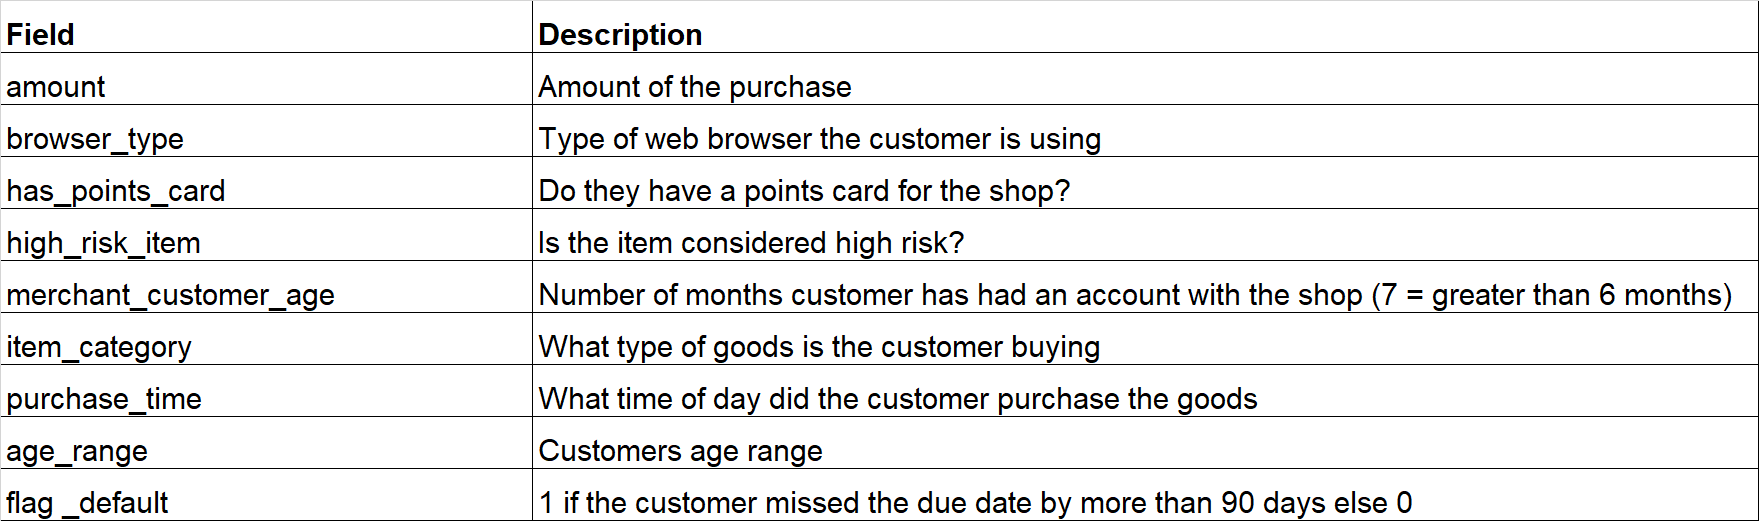

## Questions

* Is the amount in yen?
* Can we identify if the all the customers are unique indiviuals? 
* is all the information provided above avalible at the point of decisioning (ie we know the item catagory etc before we can set a limit)
* You say "For customers that missed the payment due date, Spendy decided to call and remid them of their obligation to pay. On average this call cost Spendy 300 yen per customer called" Did this result in any curing of defaults? If there was is the mor einformation on this, any additinal data? (the subsequent payment etc) (needed to calculate LGD)
* There is a spike amount at 500 yen, do we know what casuing this? is this a minimum charge for the service?
* Is there any defined risk appetite statement for Spendy, ie we will not lend more than x to a customer, we require a x% ROC?
* are there any restrictions on data use? Can we use the email and phone number that have been captured?
* Are there any know data quality issue with the historic data?
* Is there any differences in staragy between historic and new data populations?
* the task is asking to set a limit policy, to do this ideally we would need a estimate of the profitability. The text only descibes 2 income source the 2.5% payment fee and the 200 yen fee from paying at a convience store. Are these the only fee that we would like to include in the profitailiy calculation? If not can we have more information on this. Similarly the only cost that is decribed is the 300 yen for calling the customer in a default. Is this the only cost to consider or are there others (operation cost, marketing)
*  for the default flag "1 if the customer missed the due date by more than 90 days else 0" dose this include partial payment or is "missing the due date" to mean no payment has been made what so ever (NEEDED TO CACLULATE EAD) 
* in the case of the default are we to assume that the full amount of is lost (needed to calculate LGD)



In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Risk and analytics credit risk analyst exercise.xlsx',sheet_name = 'Historical Data')
df2 = pd.read_excel('Risk and analytics credit risk analyst exercise.xlsx',sheet_name = 'New Data')

In [3]:
cols = [col for col in df if not col.startswith('Unnamed:')]
print (cols)
paidy_hist_df = df[cols]
paidy_hist_df

['customer_id', 'amount', 'browser_type', 'has_points_card', 'high_risk_item', 'merchant_customer_age', 'item_category', 'purchase_time', 'age_range', 'flag_default']


,customer_id,amount,browser_type,has_points_card,high_risk_item,merchant_customer_age,item_category,purchase_time,age_range,flag_default
0,1,2849,computer,yes,NaN,2,fashion,12pm to 6pm,25-35,0
1,2,3699,computer,NaN,NaN,7,fashion,12pm to 6pm,15-25,0
2,3,2714,mobile,yes,NaN,0,electronics,12am to 6am,25-35,0
3,4,2980,mobile,yes,NaN,0,fashion,12pm to 6pm,35-45,1
4,5,1595,computer,yes,NaN,0,electronics,6pm to 12am,35-45,0
...,...,...,...,...,...,...,...,...,...,...
19995,19996,2754,other,yes,NaN,7,household,6am to 12pm,15-25,0
19996,19997,1902,computer,yes,NaN,5,fashion,12pm to 6pm,45-55,0
19997,19998,838,other,yes,NaN,0,fashion,12pm to 6pm,45-55,0
19998,19999,788,mobile,NaN,NaN,5,fashion,12pm to 6pm,15-25,1


In [4]:
paidy_hist_df.describe()

,customer_id,amount,merchant_customer_age,flag_default
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,6583.724750,2.330950,0.056350
std,5773.647028,15185.723724,2.882575,0.230602
min,1.000000,1.000000,0.000000,0.000000
25%,5000.750000,1316.000000,0.000000,0.000000
50%,10000.500000,2632.500000,0.000000,0.000000
75%,15000.250000,5399.000000,5.000000,0.000000
max,20000.000000,282424.000000,7.000000,1.000000


In [5]:
paidy_hist_df.nunique()

customer_id              20000
amount                    6920
browser_type                 3
has_points_card              1
high_risk_item               1
merchant_customer_age        8
item_category                4
purchase_time                4
age_range                    5
flag_default                 2
dtype: int64

In [6]:
paidy_hist_df.isna().sum()

customer_id                  0
amount                       0
browser_type                 0
has_points_card           2023
high_risk_item           19748
merchant_customer_age        0
item_category                0
purchase_time                0
age_range                    0
flag_default                 0
dtype: int64

In [7]:
plot_types = {'catagory': ['browser_type',
                             'has_points_card',
                             'high_risk_item',
                             'item_category',
                             'purchase_time',
                             'age_range',
#                              'flag_default',
                             'merchant_customer_age'],
              'numeric': 'amount'   
}

In [8]:
# paidy_hist_df['has_points_card'].fillna('no',inplace=True)
# paidy_hist_df['high_risk_item'].fillna('no',inplace=True)

paidy_hist_df['has_points_card'] = np.where(paidy_hist_df['has_points_card']=='yes',1,0)
paidy_hist_df['high_risk_item'] = np.where(paidy_hist_df['high_risk_item']=='yes',1,0)

paidy_hist_df

,customer_id,amount,browser_type,has_points_card,high_risk_item,merchant_customer_age,item_category,purchase_time,age_range,flag_default
0,1,2849,computer,1,0,2,fashion,12pm to 6pm,25-35,0
1,2,3699,computer,0,0,7,fashion,12pm to 6pm,15-25,0
2,3,2714,mobile,1,0,0,electronics,12am to 6am,25-35,0
3,4,2980,mobile,1,0,0,fashion,12pm to 6pm,35-45,1
4,5,1595,computer,1,0,0,electronics,6pm to 12am,35-45,0
...,...,...,...,...,...,...,...,...,...,...
19995,19996,2754,other,1,0,7,household,6am to 12pm,15-25,0
19996,19997,1902,computer,1,0,5,fashion,12pm to 6pm,45-55,0
19997,19998,838,other,1,0,0,fashion,12pm to 6pm,45-55,0
19998,19999,788,mobile,0,0,5,fashion,12pm to 6pm,15-25,1


# Get Default by catagory

In [9]:

def histo_def_rate(dset,var,graph = True,label = True):
    #Calculate the nuber of records in each group
    vol = dset.groupby(var).count()['flag_default'].reset_index().rename({'flag_default':'vol'},axis='columns')
    #Calculate the number of default in each group
    sum_def = dset.groupby(var).sum()['flag_default'].reset_index().rename({'flag_default':('flag_default_sum')},axis='columns')
    #Get data togetehr to calculate default rates
    out = pd.merge(vol,sum_def,how='left',on=var)
    out['def_rate'] = out['flag_default_sum']/out['vol']
    #Plot the resultant information
    if graph == True:
            fig, axes = plt.subplots(1, 3, figsize=(20,5))
            fig.suptitle(var,fontsize=16)
            for col, axis in zip(['vol','flag_default_sum','def_rate'],axes.flatten()):
                axis.bar(out[var],out[col])
                axis.set_title(col)
                if label == True:
                    for p in axis.patches:
                        if (p.get_height()%1 != 0):
                            height = ('{:.3f}'.format(p.get_height()))
                        else:
                            height = p.get_height()
                        axis.annotate(height, (p.get_x()+0.25, p.get_height()/2))
            plt.show()
    if graph == False:
        return out
    

     
# histo_def_rate(paidy_hist_df,'has_points_card')

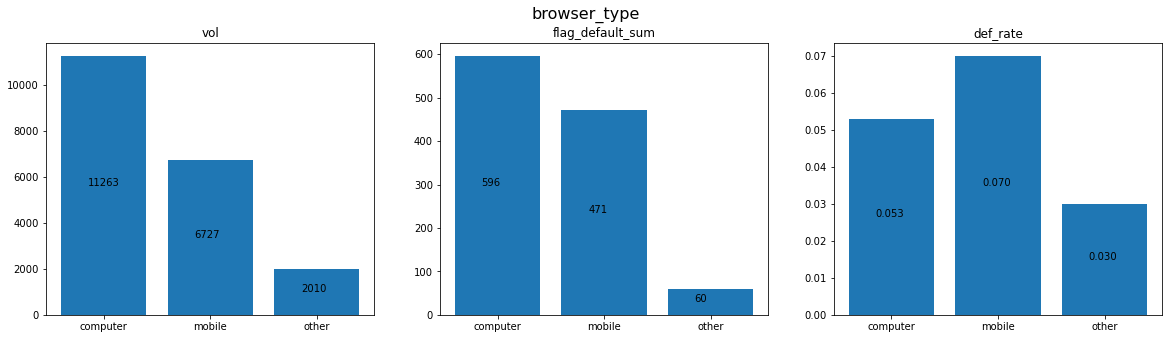

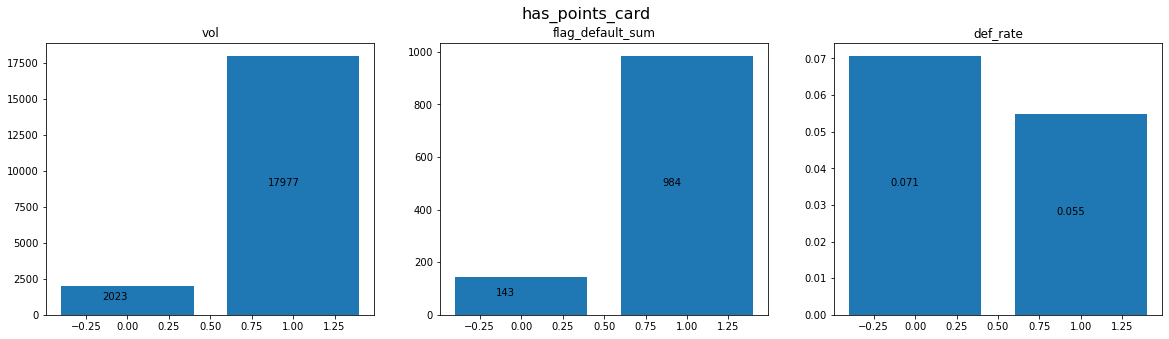

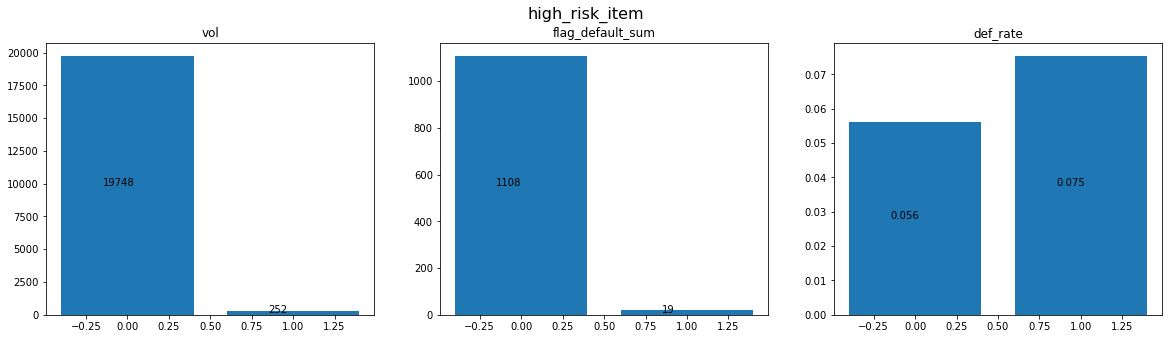

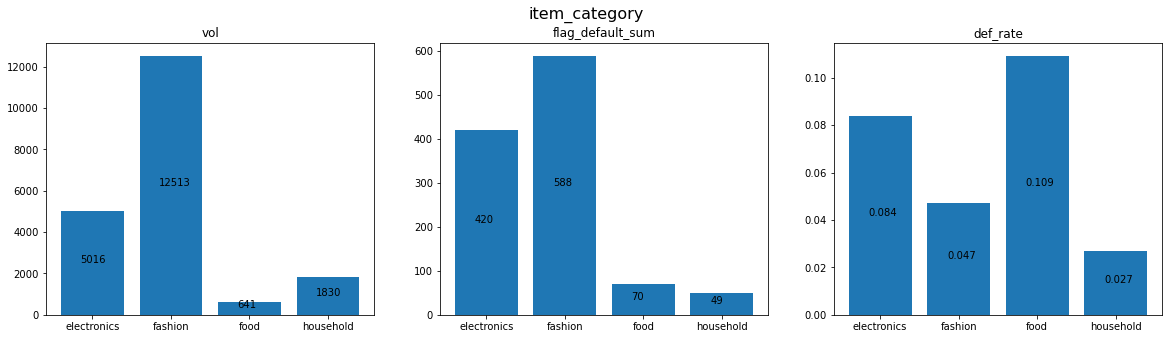

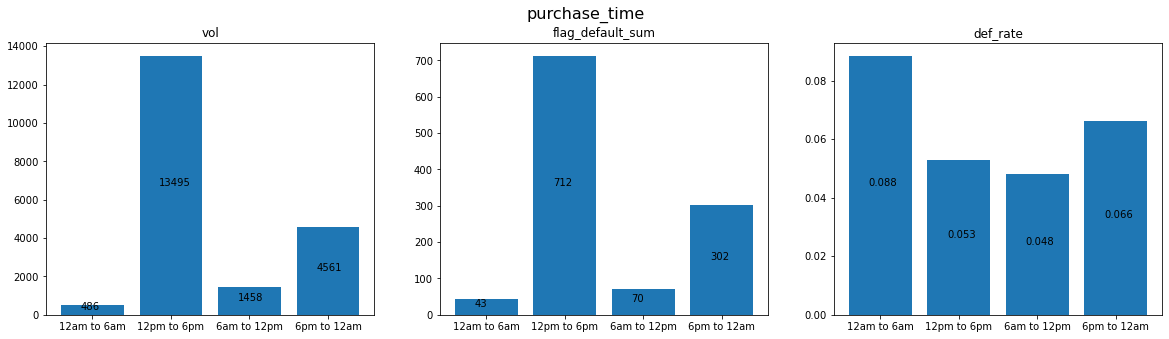

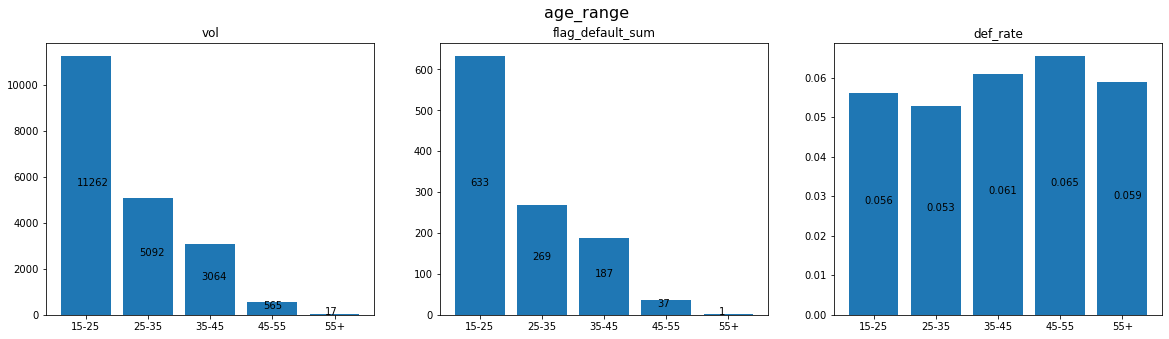

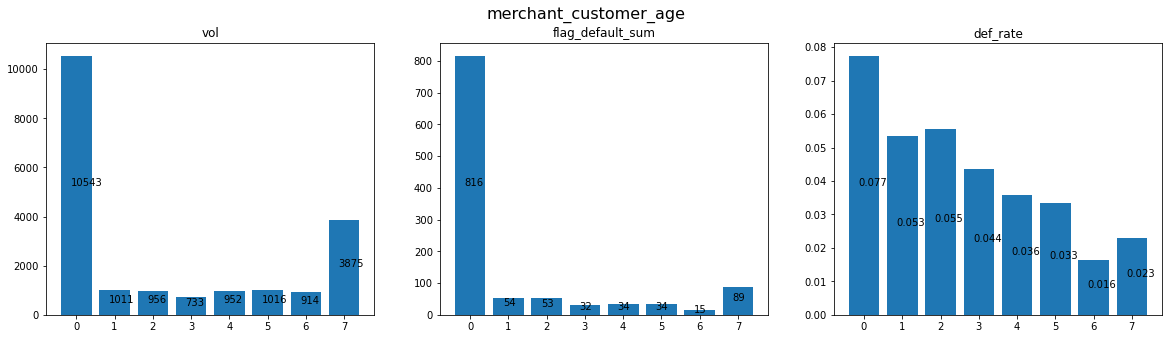

In [10]:
for cat in plot_types['catagory']:
    histo_def_rate(paidy_hist_df,cat,graph=True)



## Look at amount distibution

In [11]:
desc = paidy_hist_df['amount'].describe().to_dict()
desc

{'count': 20000.0,
 'mean': 6583.72475,
 'std': 15185.723723828476,
 'min': 1.0,
 '25%': 1316.0,
 '50%': 2632.5,
 '75%': 5399.0,
 'max': 282424.0}

In [12]:
paidy_hist_df['amount_bin'] = paidy_hist_df['amount'].apply(lambda x: (math.ceil(x/50)*50))
quart1 = paidy_hist_df[paidy_hist_df['amount'] <= desc['25%']].copy()
quart2 = paidy_hist_df[paidy_hist_df['amount'] <= desc['50%']].copy()
quart3 = paidy_hist_df[paidy_hist_df['amount'] <= desc['75%']].copy()


# histo_def_rate(quart1,'amount_bin',graph=False,label=False)

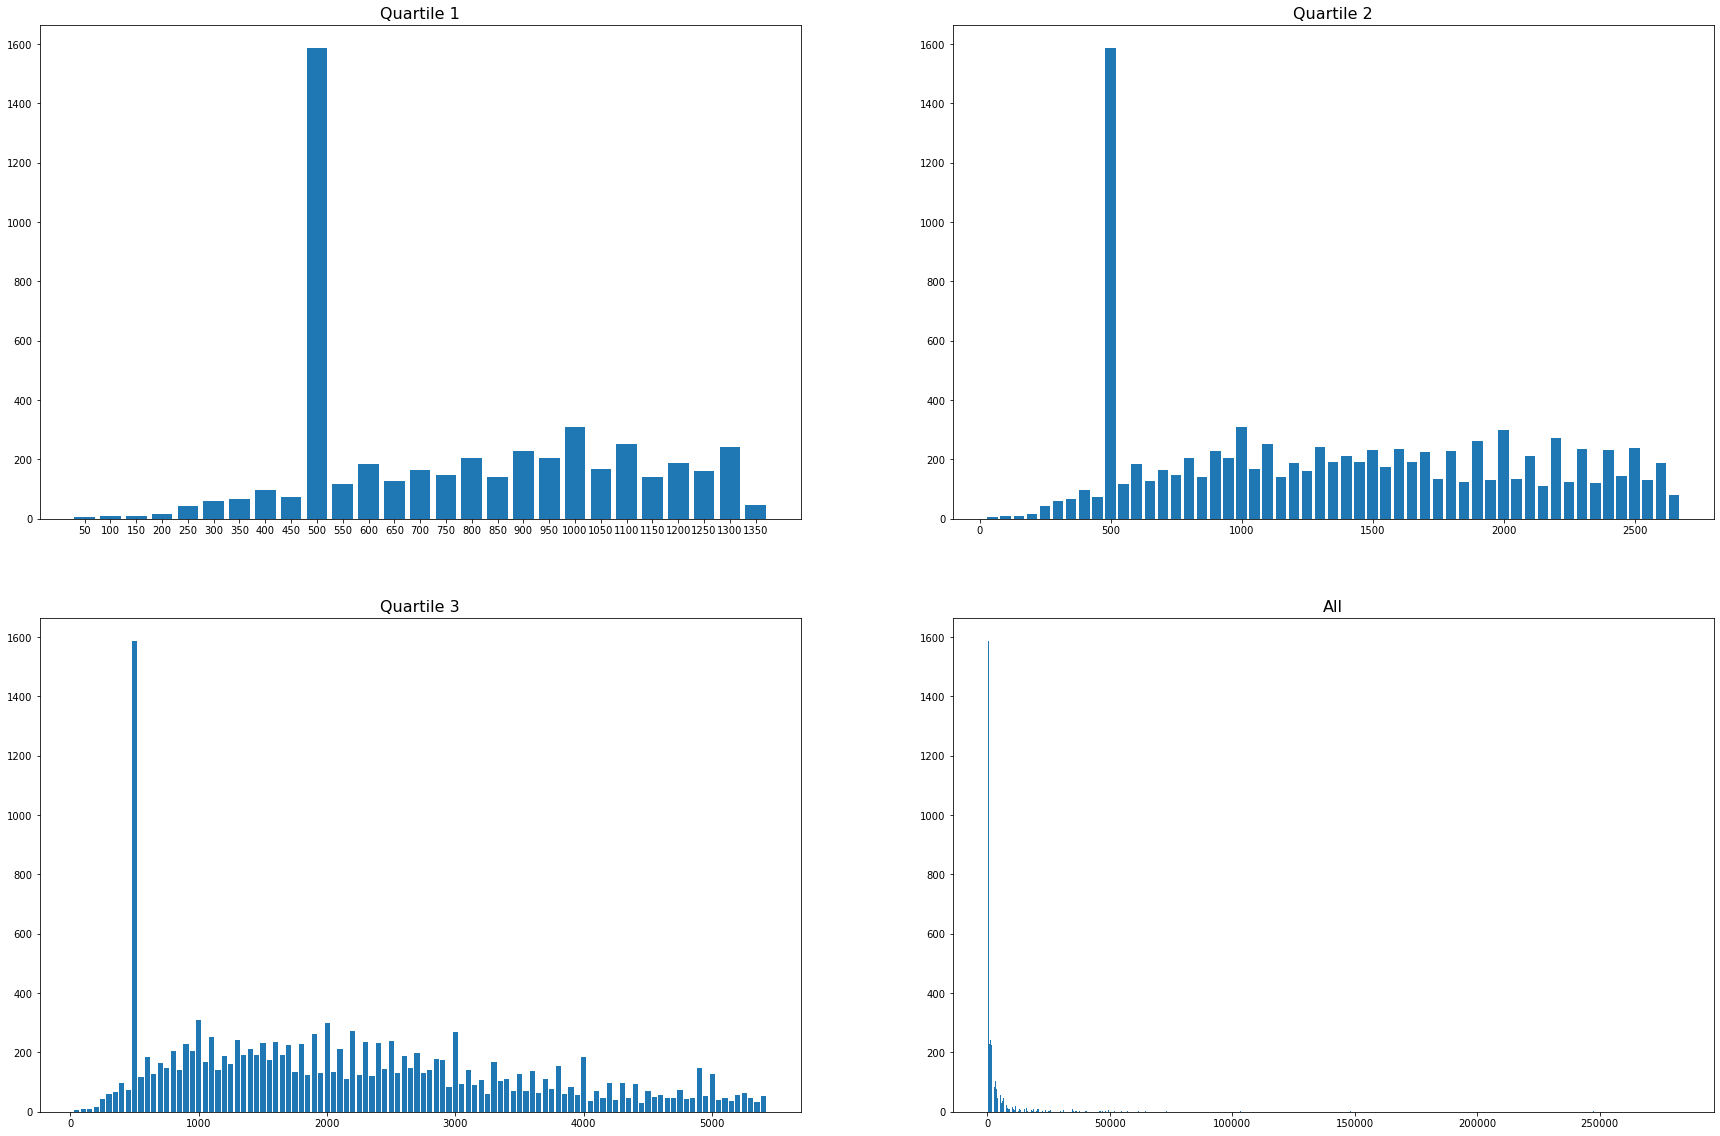

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(30,20))

# axes[0,0].hist(quart1['amount_bin'])
vols = histo_def_rate(quart1,'amount_bin',graph=False,label=False)
axes[0,0].bar(vols['amount_bin'],vols['vol'],width=40,tick_label=vols['amount_bin'])
axes[0,0].set_title('Quartile 1',fontsize=16)

vols = histo_def_rate(quart2,'amount_bin',graph=False,label=False)
axes[0,1].bar(vols['amount_bin'],vols['vol'],width=40)
axes[0,1].set_title('Quartile 2',fontsize=16)

vols = histo_def_rate(quart3,'amount_bin',graph=False,label=False)
axes[1,0].bar(vols['amount_bin'],vols['vol'],width=40)
axes[1,0].set_title('Quartile 3',fontsize=16)

vols = histo_def_rate(paidy_hist_df,'amount_bin',graph=False,label=False)
axes[1,1].bar(vols['amount_bin'],vols['vol'],width=40)
axes[1,1].set_title('All',fontsize=16)

plt.show()


In [14]:
#What is the spke
paidy_hist_df[paidy_hist_df['amount_bin'] == 500]

,customer_id,amount,browser_type,has_points_card,high_risk_item,merchant_customer_age,item_category,purchase_time,age_range,flag_default,amount_bin
11,12,500,computer,1,0,7,fashion,12pm to 6pm,15-25,0,500
13,14,500,computer,1,0,2,electronics,12pm to 6pm,15-25,0,500
16,17,500,mobile,1,0,2,fashion,12pm to 6pm,35-45,0,500
32,33,457,mobile,1,0,0,fashion,12pm to 6pm,25-35,0,500
38,39,500,other,1,0,7,electronics,6pm to 12am,15-25,0,500
...,...,...,...,...,...,...,...,...,...,...,...
19937,19938,500,computer,1,0,0,electronics,6pm to 12am,15-25,0,500
19941,19942,500,computer,1,0,0,fashion,6pm to 12am,15-25,0,500
19986,19987,500,computer,1,0,0,fashion,12pm to 6pm,15-25,0,500
19989,19990,500,computer,1,0,0,fashion,12pm to 6pm,25-35,0,500


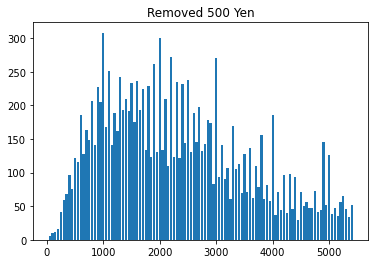

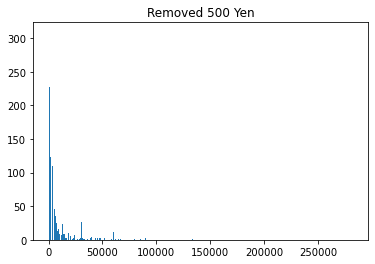

In [15]:
# remove 500 spike
vols = histo_def_rate((paidy_hist_df[(paidy_hist_df['amount'] != 500)&(paidy_hist_df['amount'] <= desc['75%'])]),'amount_bin',graph=False,label=False)
plt.bar(vols['amount_bin'],vols['vol'],width=40)
plt.title('Removed 500 Yen')
plt.show()

# remove 500 spike
vols = histo_def_rate((paidy_hist_df[(paidy_hist_df['amount'] != 500)]),'amount_bin',graph=False,label=False)
plt.bar(vols['amount_bin'],vols['vol'],width=40)
plt.title('Removed 500 Yen')
plt.show()


# New Data
## Check to see how well this aligns with training set

In [16]:
df2['has_points_card'] = np.where(df2['has_points_card']=='yes',1,0)
df2['high_risk_item'] = np.where(df2['high_risk_item']=='yes',1,0)
df2

,customer_id,amount,browser_type,has_points_card,high_risk_item,merchant_customer_age,item_category,purchase_time,age_range
0,20001,4900,computer,0,0,6,fashion,12pm to 6pm,25-35
1,20002,787,computer,1,0,0,electronics,12pm to 6pm,25-35
2,20003,500,other,1,0,5,household,12pm to 6pm,15-25
3,20004,14991,computer,1,0,0,electronics,12pm to 6pm,15-25
4,20005,58310,mobile,1,0,5,household,12am to 6am,35-45
...,...,...,...,...,...,...,...,...,...
9995,29996,1254,mobile,1,0,7,fashion,12pm to 6pm,15-25
9996,29997,19987,mobile,1,0,4,fashion,12pm to 6pm,15-25
9997,29998,400,computer,1,0,0,fashion,6pm to 12am,35-45
9998,29999,2356,other,1,0,4,fashion,6pm to 12am,15-25


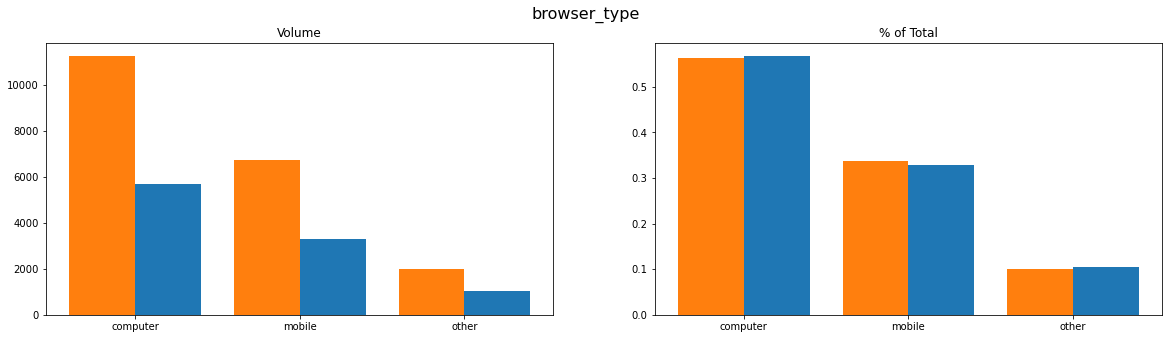

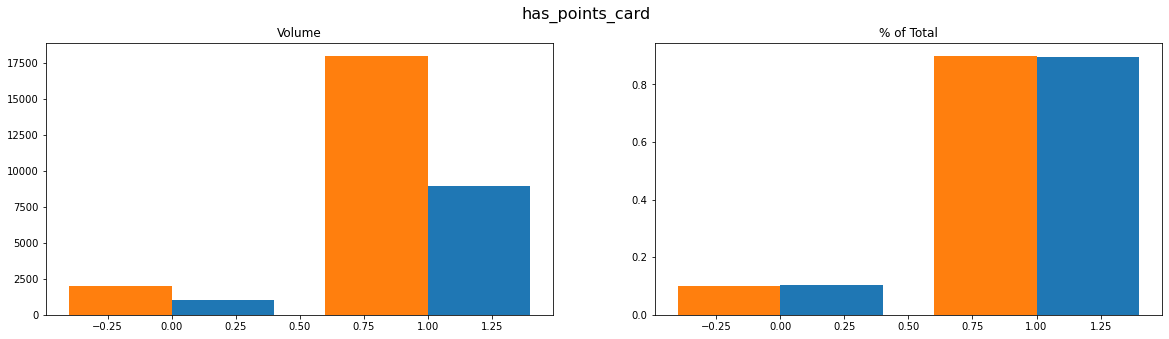

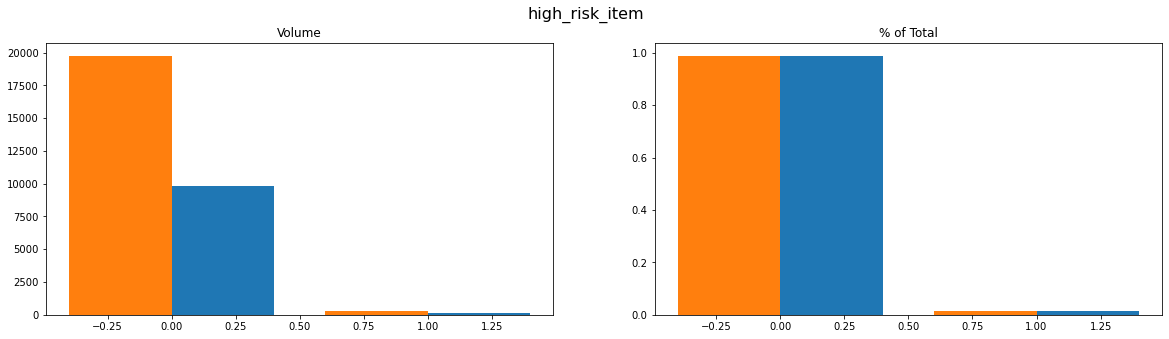

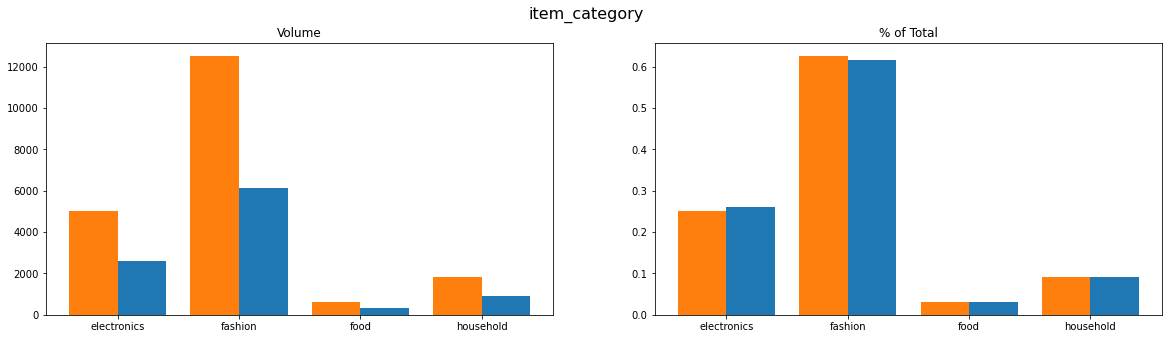

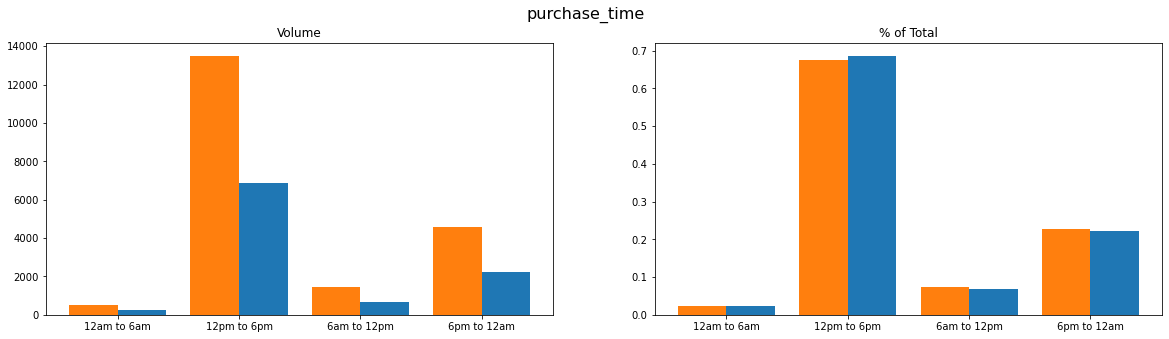

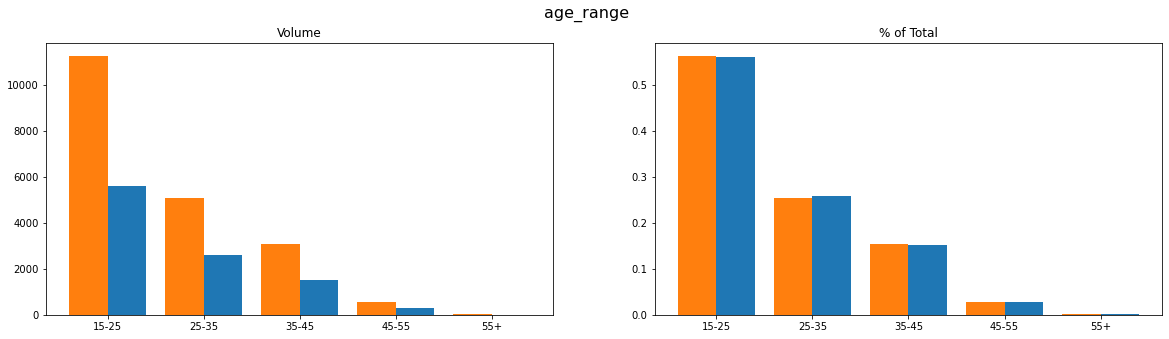

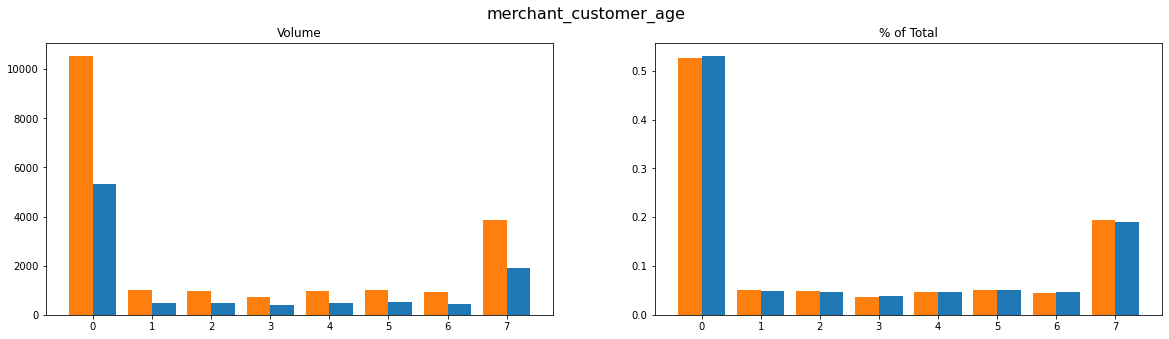

In [17]:
def new_data_hist(dset,dset2,var,w):
    fig, axes = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle(var,fontsize=16)
    
    vol = dset.groupby(var).count()['customer_id'].reset_index().rename({'customer_id':'vol'},axis='columns')
    vol2 = dset2.groupby(var).count()['customer_id'].reset_index().rename({'customer_id':'vol'},axis='columns')  
    
    axes[0].bar(vol[var],vol['vol'],width=w,align='edge')
    axes[0].bar(vol2[var],vol2['vol'],width=-w,align='edge')
    axes[0].set_title('Volume')
    
    vol['pct_total'] = vol['vol']/dset.count()['customer_id']
    vol2['pct_total'] = vol2['vol']/dset2.count()['customer_id']
    
    axes[1].bar(vol[var],vol['pct_total'],width=w,align='edge')
    axes[1].bar(vol2[var],vol2['pct_total'],width=-w,align='edge')
    
    axes[1].set_title('% of Total')
    
    
    plt.show()
    return
    

for cat in plot_types['catagory']:
    new_data_hist(df2,paidy_hist_df,cat,0.4)
    

In [18]:
df2['amount_bin'] = df2['amount'].apply(lambda x: (math.ceil(x/100)*100))
df2

,customer_id,amount,browser_type,has_points_card,high_risk_item,merchant_customer_age,item_category,purchase_time,age_range,amount_bin
0,20001,4900,computer,0,0,6,fashion,12pm to 6pm,25-35,4900
1,20002,787,computer,1,0,0,electronics,12pm to 6pm,25-35,800
2,20003,500,other,1,0,5,household,12pm to 6pm,15-25,500
3,20004,14991,computer,1,0,0,electronics,12pm to 6pm,15-25,15000
4,20005,58310,mobile,1,0,5,household,12am to 6am,35-45,58400
...,...,...,...,...,...,...,...,...,...,...
9995,29996,1254,mobile,1,0,7,fashion,12pm to 6pm,15-25,1300
9996,29997,19987,mobile,1,0,4,fashion,12pm to 6pm,15-25,20000
9997,29998,400,computer,1,0,0,fashion,6pm to 12am,35-45,400
9998,29999,2356,other,1,0,4,fashion,6pm to 12am,15-25,2400


In [19]:
# fig, axes = plt.subplots(1, 2, figsize=(20,5))
# fig.suptitle('Amount',fontsize=16)


# vol = df2.groupby('amount_bin').count()['customer_id'].reset_index().rename({'customer_id':'vol'},axis='columns')
# vol

# axes[0].bar(vol['amount_bin'],vol['vol'],width=0.4,align='edge')

desc = df2['amount'].describe().to_dict()
desc

{'count': 10000.0,
 'mean': 6591.6151,
 'std': 15660.16854777897,
 'min': 23.0,
 '25%': 1311.0,
 '50%': 2635.5,
 '75%': 5445.0,
 'max': 288484.0}

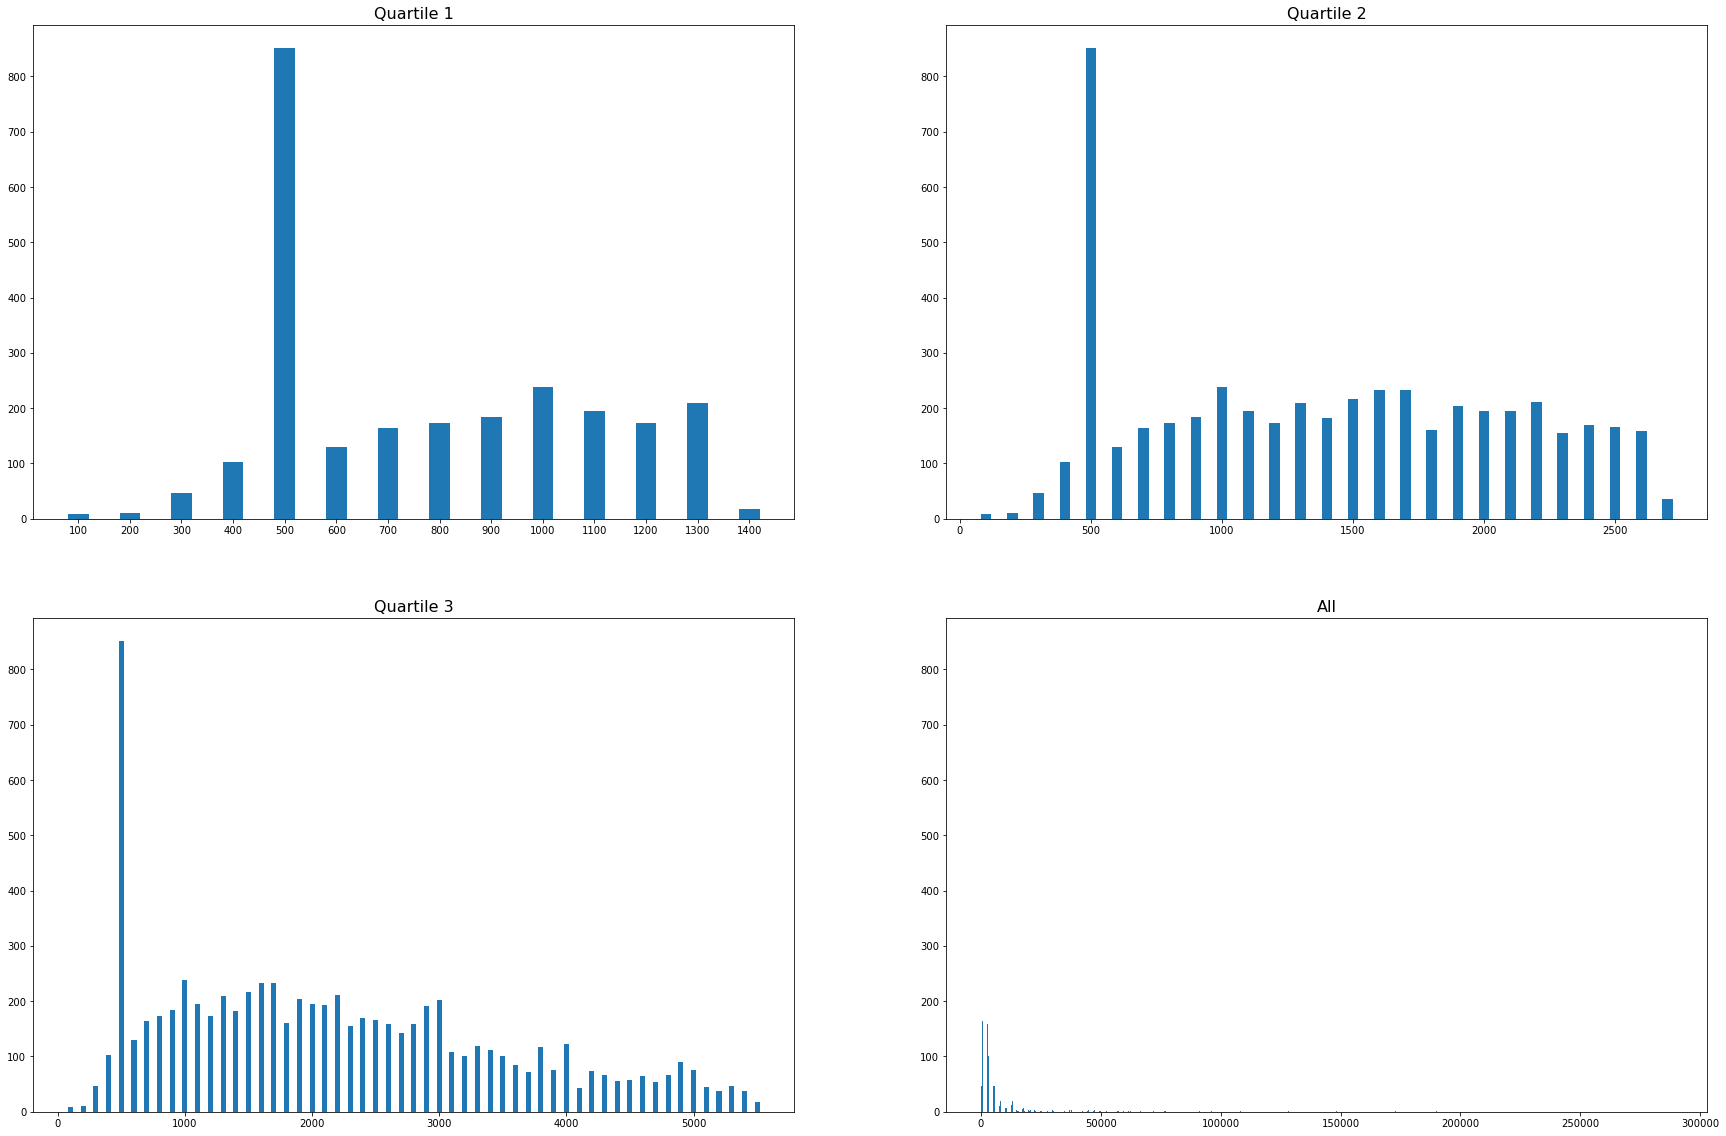

In [20]:
quart1 = df2[df2['amount'] <= desc['25%']].copy()
quart2 = df2[df2['amount'] <= desc['50%']].copy()
quart3 = df2[df2['amount'] <= desc['75%']].copy()


fig, axes = plt.subplots(2, 2, figsize=(30,20))

vols = quart1.groupby('amount_bin').count()['customer_id'].reset_index().rename({'customer_id':'vol'},axis='columns')
axes[0,0].bar(vols['amount_bin'],vols['vol'],width=40,tick_label=vols['amount_bin'])
axes[0,0].set_title('Quartile 1',fontsize=16)

vols = quart2.groupby('amount_bin').count()['customer_id'].reset_index().rename({'customer_id':'vol'},axis='columns')
axes[0,1].bar(vols['amount_bin'],vols['vol'],width=40)
axes[0,1].set_title('Quartile 2',fontsize=16)

vols = quart3.groupby('amount_bin').count()['customer_id'].reset_index().rename({'customer_id':'vol'},axis='columns')
axes[1,0].bar(vols['amount_bin'],vols['vol'],width=40)
axes[1,0].set_title('Quartile 3',fontsize=16)

vols = df2.groupby('amount_bin').count()['customer_id'].reset_index().rename({'customer_id':'vol'},axis='columns')
axes[1,1].bar(vols['amount_bin'],vols['vol'],width=40)
axes[1,1].set_title('All',fontsize=16)

plt.show()

# Pre Processing

## Features

In [21]:
#pre processing

paidy_hist_df['has_points_card'] = np.where(paidy_hist_df['has_points_card']=='yes',1,0) ##only run this once or you will overwitre everything
paidy_hist_df['high_risk_item'] = np.where(paidy_hist_df['high_risk_item']=='yes',1,0) ##only run this once or you will overwitre everything

# #One hot encoding
paidy_hist_df = pd.get_dummies(paidy_hist_df, columns=['browser_type','item_category','purchase_time','merchant_customer_age','age_range'])
paidy_hist_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,customer_id,amount,has_points_card,high_risk_item,flag_default,amount_bin,browser_type_computer,browser_type_mobile,browser_type_other,item_category_electronics,...,merchant_customer_age_3,merchant_customer_age_4,merchant_customer_age_5,merchant_customer_age_6,merchant_customer_age_7,age_range_15-25,age_range_25-35,age_range_35-45,age_range_45-55,age_range_55+
0,1,2849,0,0,0,2850,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,3699,0,0,0,3700,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,3,2714,0,0,0,2750,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,2980,0,0,1,3000,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,1595,0,0,0,1600,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2754,0,0,0,2800,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
19996,19997,1902,0,0,0,1950,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
19997,19998,838,0,0,0,850,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
19998,19999,788,0,0,1,800,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [22]:
# a = paidy_hist_df['merchant_customer_age'].unique()
# print(np.sort(a))
# paidy_hist_df.columns.to_list()

In [23]:
# # Ranked Hot
# ranked = ['merchant_customer_age','age_range']

# def rankedHot(dset,var):
#     for val in np.sort(dset[var].unique()):
#         col = str(var)+'_'+str(val)
#         dset[col] = np.where(dset[var]>=val,1,0)
        
# rankedHot(paidy_hist_df,'merchant_customer_age')
# rankedHot(paidy_hist_df,'age_range')
# paidy_hist_df

In [24]:
# Calculate fees
paidy_hist_df['payment_fee'] = paidy_hist_df['amount']*0.025
convenience_store_fee = 200

convenience_store_pay_pct = 0.8 #Will ahve to be adjusted is we can get more specific information
paidy_hist_df['convenience_store_fee'] = np.where(paidy_hist_df['flag_default'] == 0,(convenience_store_fee*convenience_store_pay_pct),0)

collection_fee = 300
paidy_hist_df['collection_fee'] = np.where(paidy_hist_df['flag_default'] == 1,(collection_fee),0)
paidy_hist_df['credit_loss'] = paidy_hist_df['flag_default']*paidy_hist_df['amount']*0.975

paidy_hist_df['profit'] = paidy_hist_df['payment_fee'] + paidy_hist_df['convenience_store_fee'] - paidy_hist_df['credit_loss'] - paidy_hist_df['collection_fee']

paidy_hist_df

,customer_id,amount,has_points_card,high_risk_item,flag_default,amount_bin,browser_type_computer,browser_type_mobile,browser_type_other,item_category_electronics,...,age_range_15-25,age_range_25-35,age_range_35-45,age_range_45-55,age_range_55+,payment_fee,convenience_store_fee,collection_fee,credit_loss,profit
0,1,2849,0,0,0,2850,1,0,0,0,...,0,1,0,0,0,71.225,160.0,0,0.0,231.225
1,2,3699,0,0,0,3700,1,0,0,0,...,1,0,0,0,0,92.475,160.0,0,0.0,252.475
2,3,2714,0,0,0,2750,0,1,0,1,...,0,1,0,0,0,67.850,160.0,0,0.0,227.850
3,4,2980,0,0,1,3000,0,1,0,0,...,0,0,1,0,0,74.500,0.0,300,2905.5,-3131.000
4,5,1595,0,0,0,1600,1,0,0,1,...,0,0,1,0,0,39.875,160.0,0,0.0,199.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2754,0,0,0,2800,0,0,1,0,...,1,0,0,0,0,68.850,160.0,0,0.0,228.850
19996,19997,1902,0,0,0,1950,1,0,0,0,...,0,0,0,1,0,47.550,160.0,0,0.0,207.550
19997,19998,838,0,0,0,850,0,0,1,0,...,0,0,0,1,0,20.950,160.0,0,0.0,180.950
19998,19999,788,0,0,1,800,0,1,0,0,...,1,0,0,0,0,19.700,0.0,300,768.3,-1048.600


# Upsample to get better balance of defaults

In [25]:
# defaults = paidy_hist_df['flag_default'].value_counts()
# defaults[1]

In [26]:
# ## Upsample to get balance in data
# from sklearn.utils import resample

# # Separate majority and minority classes
# df_majority = paidy_hist_df[paidy_hist_df['flag_default']==0]
# df_minority = paidy_hist_df[paidy_hist_df['flag_default']==1]
 
# # # Upsample minority class
# # df_minority_upsampled = resample(df_minority, 
# #                                  replace=True,     # sample with replacement
# #                                  n_samples=defaults[0],    # to match majority class
# #                                  random_state=123) # reproducible results

# # Combine majority class with upsampled minority class
# # df_upsampled = pd.concat([df_majority, df_minority_upsampled])


# # Down sample majority class
# df_minority_upsampled = resample(df_majority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=defaults[1],    # to match majority class
#                                  random_state=123) # reproducible results

# # Combine minority class with downsampled mijrity class
# df_upsampled = pd.concat([df_minority, df_minority_upsampled])

# # Display new class counts
# # df_upsampled['flag_default'].value_counts()
# df_upsampled

In [27]:
df_upsampled = paidy_hist_df.copy()

build a limit policy that can be applied in the future to set maximum purchase amounts for new customers
Your target should be to maximise the profitability for Spendy by accepting orrejecting purchases based on the information
provided.

Apply this policy to the next 10,000 new customers (New Data sheet) 
● How does your model perform?
● How many of the 10,000 customers should we approve?
● How many of these customers do you expect would default on theirrepayment?
● What would be the expected profit/loss for spendy from these purchases?
● How would you approach this exercise if the business wanted to optimise growth?



## Build a PD Model

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [29]:
df_upsampled.columns.to_list()

['customer_id',
 'amount',
 'has_points_card',
 'high_risk_item',
 'flag_default',
 'amount_bin',
 'browser_type_computer',
 'browser_type_mobile',
 'browser_type_other',
 'item_category_electronics',
 'item_category_fashion',
 'item_category_food',
 'item_category_household',
 'purchase_time_12am to 6am',
 'purchase_time_12pm to 6pm',
 'purchase_time_6am to 12pm',
 'purchase_time_6pm to 12am',
 'merchant_customer_age_0',
 'merchant_customer_age_1',
 'merchant_customer_age_2',
 'merchant_customer_age_3',
 'merchant_customer_age_4',
 'merchant_customer_age_5',
 'merchant_customer_age_6',
 'merchant_customer_age_7',
 'age_range_15-25',
 'age_range_25-35',
 'age_range_35-45',
 'age_range_45-55',
 'age_range_55+',
 'payment_fee',
 'convenience_store_fee',
 'collection_fee',
 'credit_loss',
 'profit']

In [30]:
not_at_decison = ['customer_id',
                  'amount',
                  'flag_default',
                  'amount_bin',
                  'payment_fee',
                  'age_range',
                  'merchant_customer_age',
                  'convenience_store_fee',
                  'collection_fee',
                  'credit_loss',
                  'profit']

inputs = [x for x in df_upsampled.columns.to_list() if x not in not_at_decison]
df_upsampled[inputs].columns

Index(['has_points_card', 'high_risk_item', 'browser_type_computer',
       'browser_type_mobile', 'browser_type_other',
       'item_category_electronics', 'item_category_fashion',
       'item_category_food', 'item_category_household',
       'purchase_time_12am to 6am', 'purchase_time_12pm to 6pm',
       'purchase_time_6am to 12pm', 'purchase_time_6pm to 12am',
       'merchant_customer_age_0', 'merchant_customer_age_1',
       'merchant_customer_age_2', 'merchant_customer_age_3',
       'merchant_customer_age_4', 'merchant_customer_age_5',
       'merchant_customer_age_6', 'merchant_customer_age_7', 'age_range_15-25',
       'age_range_25-35', 'age_range_35-45', 'age_range_45-55',
       'age_range_55+'],
      dtype='object')

In [31]:
# X = df_upsampled[inputs]

# y = df_upsampled['flag_default']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
#                                                     test_size=0.2,
#                                                     random_state=4)

# X_train.shape, y_train.shape, X_test.shape, y_test.shape


Decision Tree
Train Difference: 1.1368683772161603e-13
Decision Tree: Actual 925 vs Expected 924.9999999999999
Accuracy: 0.9421875
Test Difference: -26.37529195291711
Decision Tree: Actual 202 vs Expected 228.3752919529171
Accuracy: 0.9495




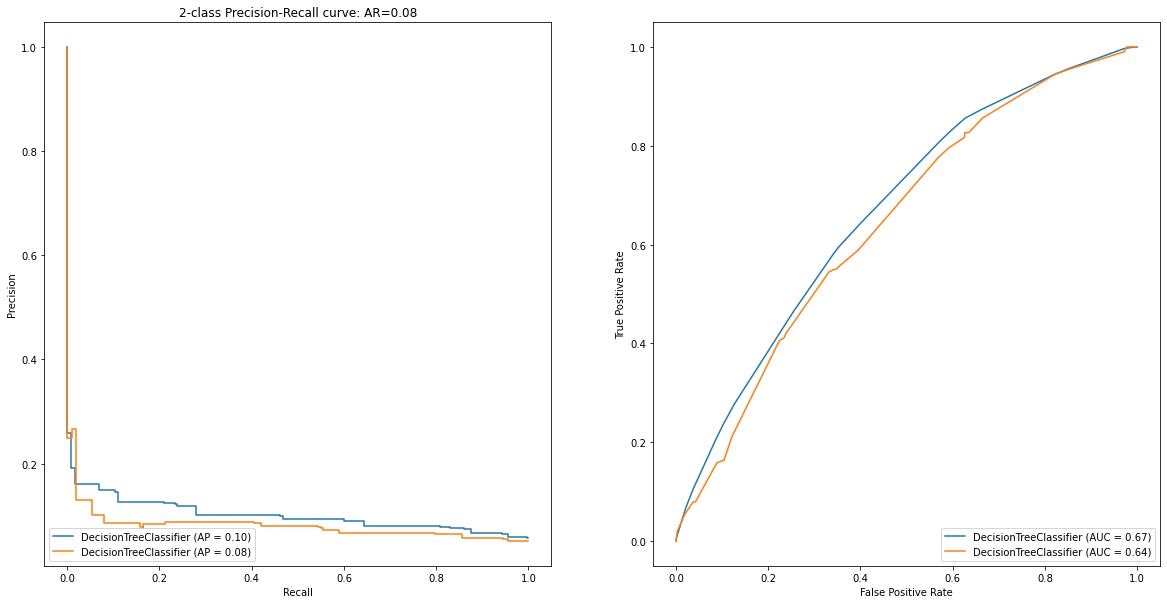

Random Forest
Train Difference: 6.481973358831283
Random Forest: Actual 925 vs Expected 918.5180266411687
Accuracy: 0.9421875
Test Difference: -26.565072081417952
Random Forest: Actual 202 vs Expected 228.56507208141795
Accuracy: 0.9495




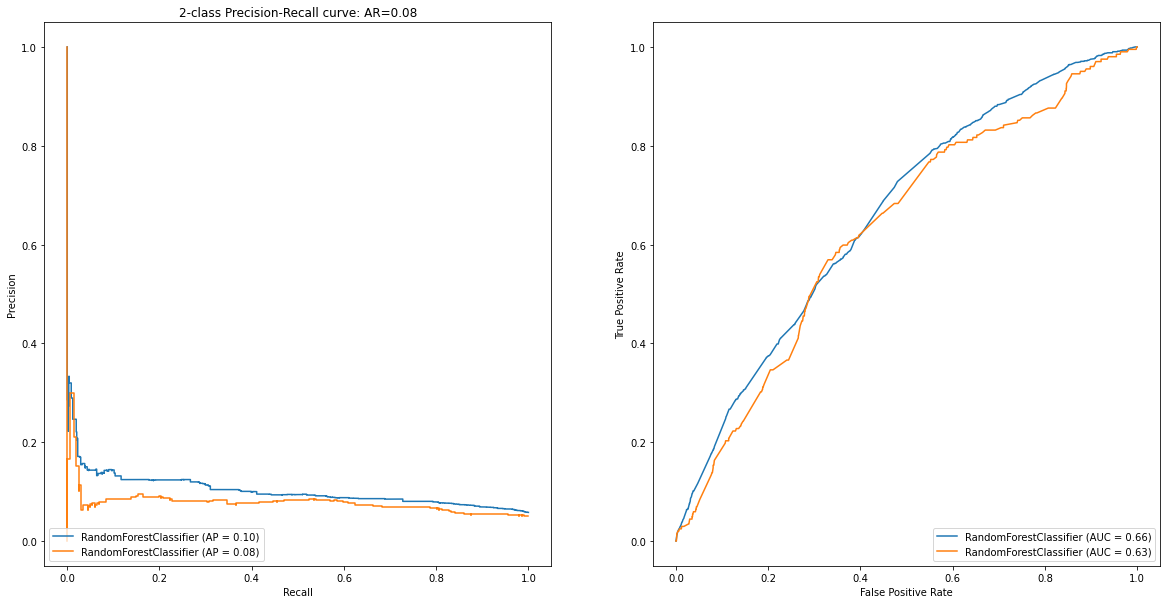

Logistic Regression
Train Difference: 0.004011986740465545
Logistic Regression: Actual 925 vs Expected 924.9959880132595
Accuracy: 0.9421875
Test Difference: -25.77402200244967
Logistic Regression: Actual 202 vs Expected 227.77402200244967
Accuracy: 0.9495




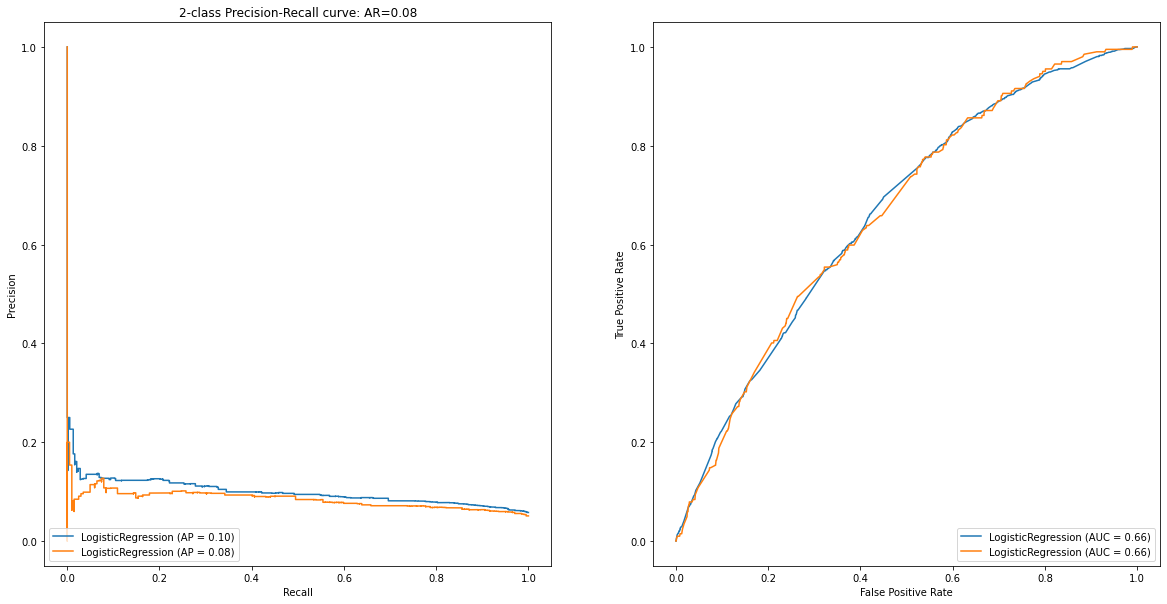

In [32]:
# print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score
# from sklearn.metrics import recall_score
from sklearn.metrics import plot_precision_recall_curve

h = .02  # step size in the mesh

X = df_upsampled[inputs]

y = df_upsampled['flag_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123)

names = ["Decision Tree", "Random Forest", "Logistic Regression"]



classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025,probability=True),
#     SVC(gamma=2, C=1,probability=True),
    DecisionTreeClassifier(max_depth=5, 
#                            class_weight=balancing
                          ),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, 
#                            class_weight=balancing
                          ),
#     GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=123),
#     RidgeClassifier(),
    LogisticRegression(random_state=123, 
#                        class_weight=balancing
                      )
            ]

for name, clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    y_score = clf.predict_proba(X_train)[:,1]
    dif =((y_train.sum()-y_score.sum()))
#     Mean accuracy = clf.score(X_train,y_train)
    print('{}'.format(name))
    print('Train Difference: {}'.format((y_train.sum()-y_score.sum())))
    print('{}: Actual {} vs Expected {}'.format(name,y_train.sum(), y_score.sum()))
    print('Accuracy: {}'.format(clf.score(X_train,y_train)))
    
    fig, axes = plt.subplots(1, 2, figsize=(20,10))
    
#     average_precision = average_precision_score(y_train, y_score)
    average_recall = average_precision_score(y_train, y_score)
    disp = plot_precision_recall_curve(clf, X_train, y_train, ax=axes[0])
    disp.ax_.set_title('2-class Precision-Recall curve: '
                       'AR={0:0.2f}'.format(average_recall))
#     plt.show()
    
    y_score = clf.predict_proba(X_test)[:,1]
    print('Test Difference: {}'.format((y_test.sum()-y_score.sum())))
    print('{}: Actual {} vs Expected {}'.format(name,y_test.sum(), y_score.sum()))
    print('Accuracy: {}'.format(clf.score(X_test,y_test)))
    print('\n')
    
#     average_precision = average_precision_score(y_test, y_score)
    average_recall = average_precision_score(y_test, y_score)
    disp = plot_precision_recall_curve(clf, X_test, y_test, ax=axes[0])
    disp.ax_.set_title('2-class Precision-Recall curve: '
                       'AR={0:0.2f}'.format(average_recall))
    
    disp = plot_roc_curve(clf, X_train, y_train, ax=axes[1])
    disp = plot_roc_curve(clf, X_test, y_test, ax=axes[1])
    
    plt.show()
    



# Decsion Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'F1_Score':'f1'}

gs = GridSearchCV(DecisionTreeClassifier(random_state=123),
                  param_grid={'max_depth': range(2, 12, 1),'min_samples_leaf':range(100, 1000, 50)},
                  scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_
# results

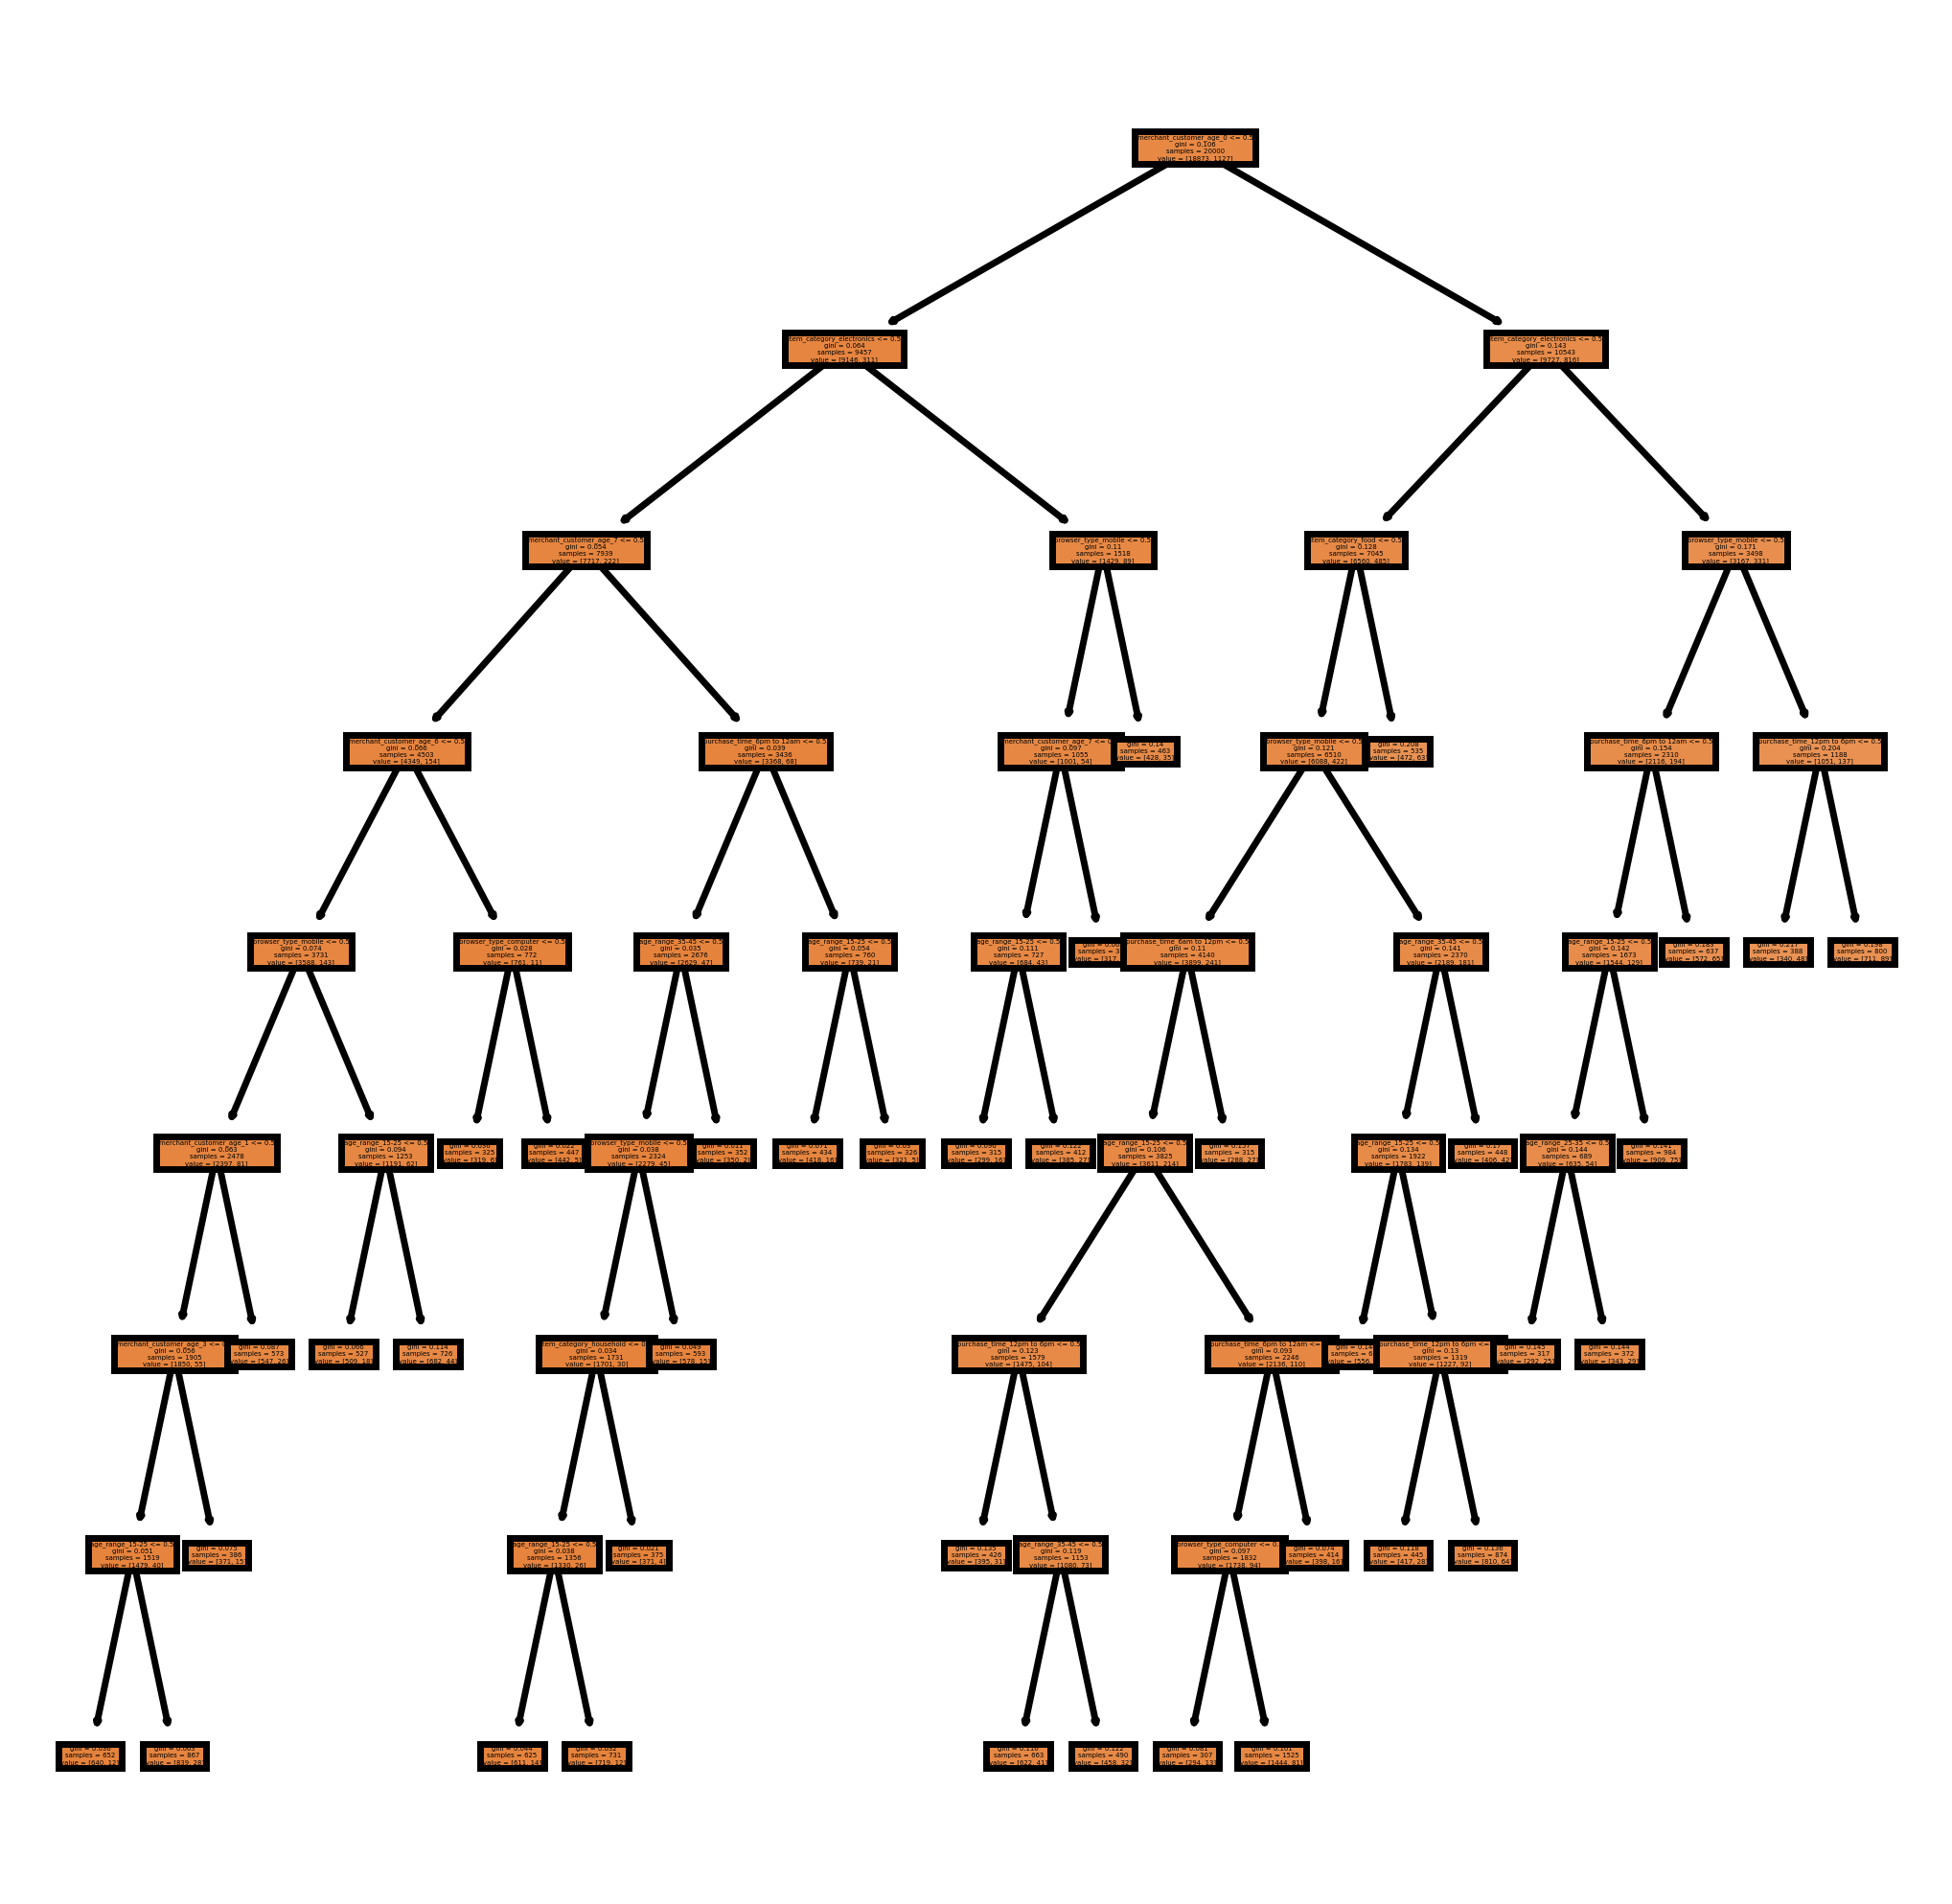

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


clf = gs.best_estimator_
y_score = clf.predict_proba(X)[:,1]
pred = clf.predict(X)
np.unique(pred), pred


# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)

tree.plot_tree(clf,
           feature_names = inputs, 
           filled = True)
plt.savefig("tree.png")


In [35]:
clf.fit(X_train,y_train)
## Check that you actualy get a default prediction
unique, counts = np.unique(clf.predict(X_train), return_counts=True)
unique, counts

(array([0], dtype=int64), array([16000], dtype=int64))

Confusion matrix, without normalization
[[15075     0]
 [  925     0]]


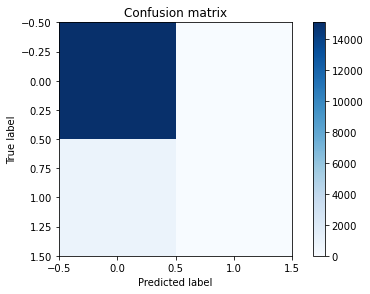

In [36]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
#     tick_marks = np.arange(len(y_train.target_names))
#     plt.xticks(tick_marks, iris.target_names, rotation=45)
#     plt.yticks(tick_marks, iris.target_names)
    
#     tick_marks = [np.arange(len(y_train.target_names))]
#     plt.xticks(tick_marks, iris.target_names, rotation=45)
#     plt.yticks(tick_marks, iris.target_names)
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(y_train, clf.predict(X_train))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

 Decison Tree Upsampled
Train Difference: 0.0
 Decison Tree Upsampled: Actual 925 vs Expected 925.0
Accuracy: 0.9421875
Test Difference: -26.64937605903785
 Decison Tree Upsampled: Actual 202 vs Expected 228.64937605903785
Accuracy: 0.9495




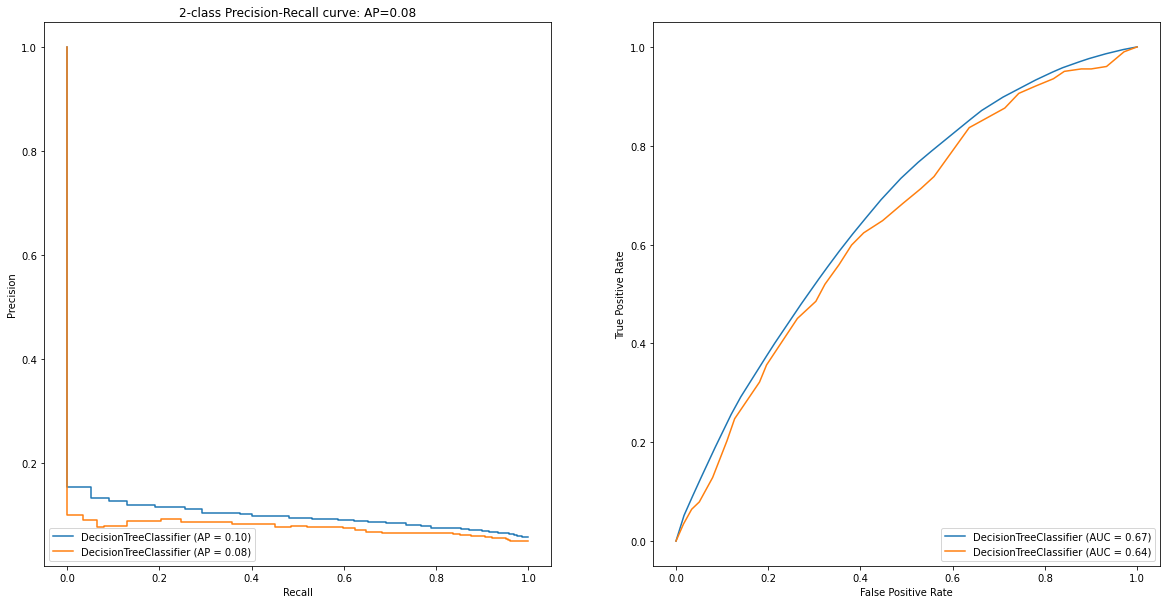

In [37]:
name=' Decison Tree Upsampled'

y_score = clf.predict_proba(X_train)[:,1]
dif =((y_train.sum()-y_score.sum()))
#     Mean accuracy = clf.score(X_train,y_train)
print('{}'.format(name))
print('Train Difference: {}'.format((y_train.sum()-y_score.sum())))
print('{}: Actual {} vs Expected {}'.format(name,y_train.sum(), y_score.sum()))
print('Accuracy: {}'.format(clf.score(X_train,y_train)))

fig, axes = plt.subplots(1, 2, figsize=(20,10))

average_precision = average_precision_score(y_train, y_score)
disp = plot_precision_recall_curve(clf, X_train, y_train, ax=axes[0])
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
#     plt.show()

y_score = clf.predict_proba(X_test)[:,1]
print('Test Difference: {}'.format((y_test.sum()-y_score.sum())))
print('{}: Actual {} vs Expected {}'.format(name,y_test.sum(), y_score.sum()))
print('Accuracy: {}'.format(clf.score(X_test,y_test)))
print('\n')

average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(clf, X_test, y_test, ax=axes[0])
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

disp = plot_roc_curve(clf, X_train, y_train, ax=axes[1])
disp = plot_roc_curve(clf, X_test, y_test, ax=axes[1])

plt.show()

In [38]:
## Check that you actualy get a default prediction
unique, counts = np.unique(clf.predict(X_train), return_counts=True)
unique, counts

(array([0], dtype=int64), array([16000], dtype=int64))

# Model on orginial Data

 Decison Tree Paidy Data
Train Difference: -26.649376059037877
 Decison Tree Paidy Data: Actual 1127 vs Expected 1153.6493760590379
Accuracy: 0.94365


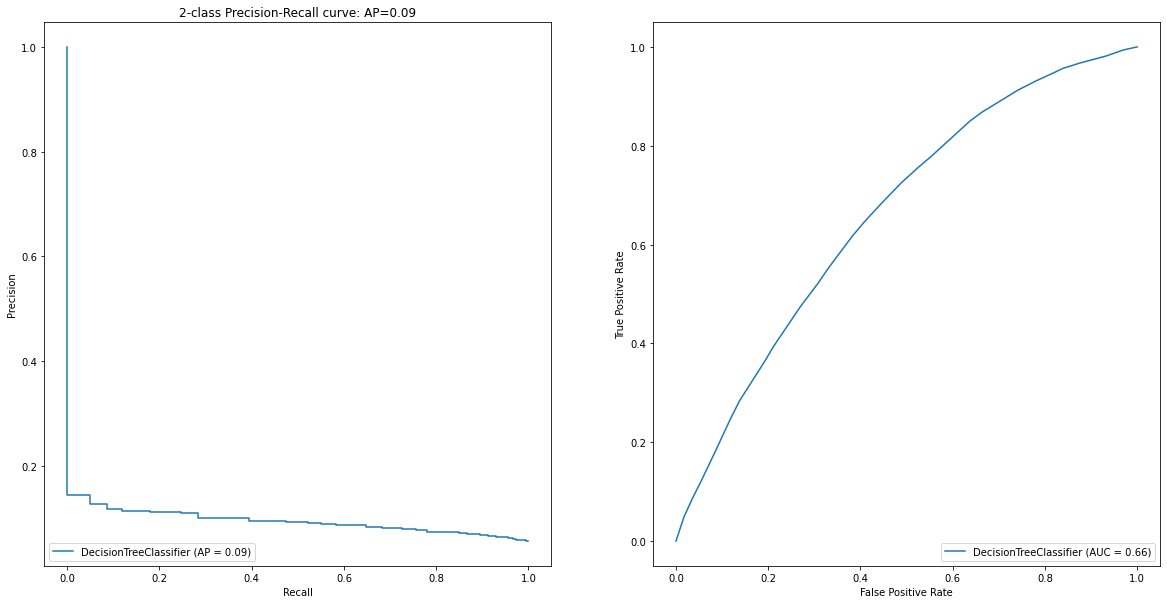

In [39]:
name=' Decison Tree Paidy Data'

y_score = clf.predict_proba(paidy_hist_df[inputs])[:,1]
#     Mean accuracy = clf.score(X_train,y_train)
print('{}'.format(name))
print('Train Difference: {}'.format(((paidy_hist_df['flag_default'].sum()-y_score.sum()))) )
print('{}: Actual {} vs Expected {}'.format(name, (paidy_hist_df['flag_default'].sum()), (y_score.sum())) )
print('Accuracy: {}'.format(clf.score(paidy_hist_df[inputs],paidy_hist_df['flag_default'])))

fig, axes = plt.subplots(1, 2, figsize=(20,10))

average_precision = average_precision_score(paidy_hist_df['flag_default'], y_score)
disp = plot_precision_recall_curve(clf, paidy_hist_df[inputs], paidy_hist_df['flag_default'], ax=axes[0])
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

disp = plot_roc_curve(clf, paidy_hist_df[inputs], paidy_hist_df['flag_default'], ax=axes[1])

plt.show()

# Logistic Regresstion

In [40]:
from sklearn.linear_model import LogisticRegression

name=' Logistic Paidy Data'


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'F1_Score':'f1', 'Precision':'precision', 'Recall':'recall'}

gs = GridSearchCV(DecisionTreeClassifier(random_state=123, class_weight='balanced'),
                  param_grid={'max_depth': range(2, 12, 1),'min_samples_leaf':range(100, 1000, 50)},
                  scoring=scoring, refit='F1_Score', return_train_score=True)
gs.fit(X_train, y_train)
results = gs.cv_results_

clf = LogisticRegression(random_state=123).fit(X_train,y_train)
clf = gs.best_estimator_

In [41]:
unique, counts = np.unique(clf.predict(X_train), return_counts=True)
unique, counts

(array([0, 1], dtype=int64), array([8235, 7765], dtype=int64))

Confusion matrix, without normalization
[[7980 7095]
 [ 255  670]]


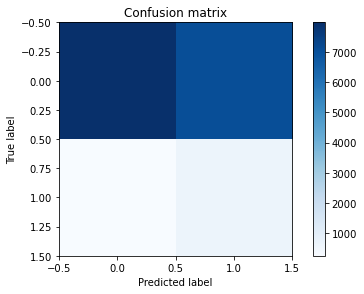

In [42]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
#     tick_marks = np.arange(len(y_train.target_names))
#     plt.xticks(tick_marks, iris.target_names, rotation=45)
#     plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(y_train, clf.predict(X_train))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

 Logistic Paidy Data Upsampled
Train Difference: -6378.866927994408
 Logistic Paidy Data: Actual 925 vs Expected 7303.866927994408
Accuracy: 0.540625
Test Difference: -1626.2075541271681
 Logistic Paidy Data: Actual 202 vs Expected 1828.2075541271681
Accuracy: 0.53075




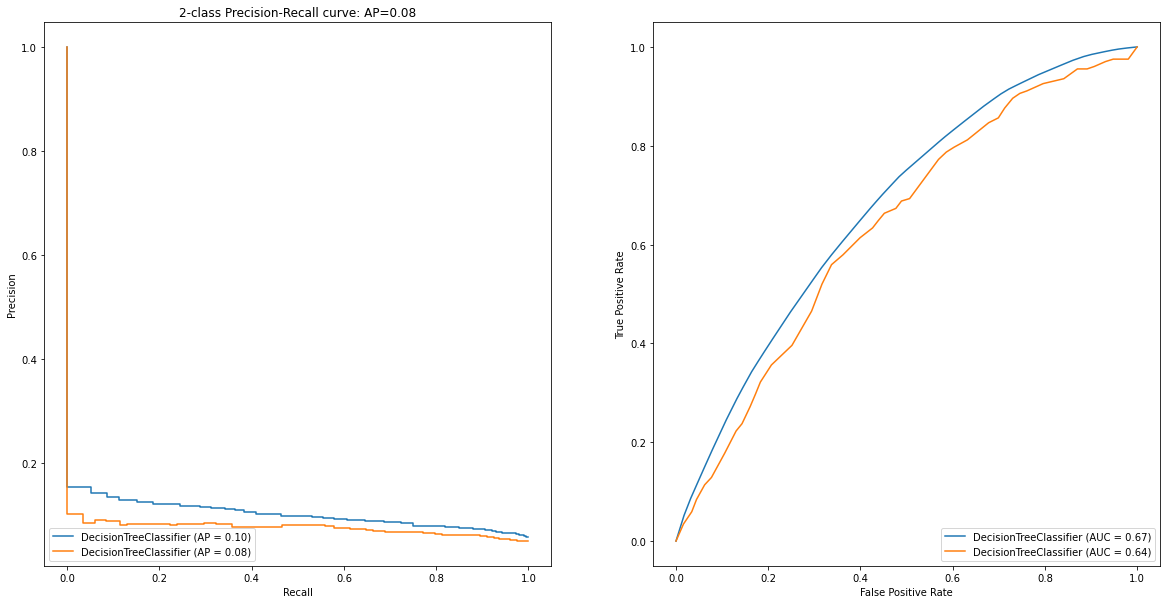

In [43]:
y_score = clf.predict_proba(X_train)[:,1]
dif =((y_train.sum()-y_score.sum()))
#     Mean accuracy = clf.score(X_train,y_train)
print('{} Upsampled'.format(name))
print('Train Difference: {}'.format((y_train.sum()-y_score.sum())))
print('{}: Actual {} vs Expected {}'.format(name,y_train.sum(), y_score.sum()))
print('Accuracy: {}'.format(clf.score(X_train,y_train)))

fig, axes = plt.subplots(1, 2, figsize=(20,10))

average_precision = average_precision_score(y_train, y_score)
disp = plot_precision_recall_curve(clf, X_train, y_train, ax=axes[0])
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
#     plt.show()

y_score = clf.predict_proba(X_test)[:,1]
print('Test Difference: {}'.format((y_test.sum()-y_score.sum())))
print('{}: Actual {} vs Expected {}'.format(name,y_test.sum(), y_score.sum()))
print('Accuracy: {}'.format(clf.score(X_test,y_test)))
print('\n')

average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(clf, X_test, y_test, ax=axes[0])
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

disp = plot_roc_curve(clf, X_train, y_train, ax=axes[1])
disp = plot_roc_curve(clf, X_test, y_test, ax=axes[1])

plt.show()

# Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

name=' Gradient Boosting Data'

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'F1_Score':'f1', 'Recall':'recall'}

gs = GridSearchCV(GradientBoostingClassifier(random_state=123,learning_rate = 0.1,n_estimators=100,max_depth=1),
                                             param_grid={
                                                          'min_samples_leaf':range(10, 20, 10), \
                                                         }
                                             ,scoring=scoring, refit='F1_Score', return_train_score=True)
                  
gs.fit(X,y)
results = gs.cv_results_

clf = gs.best_estimator_

In [45]:
unique, counts = np.unique(clf.predict(X_train), return_counts=True)
unique, counts

(array([0], dtype=int64), array([16000], dtype=int64))

Confusion matrix, without normalization
[[15075     0]
 [  925     0]]


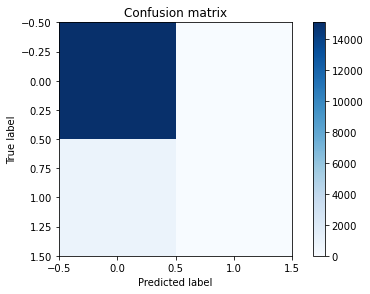

In [46]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
#     tick_marks = np.arange(len(y_train.target_names))
#     plt.xticks(tick_marks, iris.target_names, rotation=45)
#     plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cm = confusion_matrix(y_train, clf.predict(X_train))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

 Gradient Boosting Data Upsampled
Train Difference: 21.225077080528195
 Gradient Boosting Data: Actual 925 vs Expected 903.7749229194718
Accuracy: 0.9421875
Test Difference: -21.342178465159236
 Gradient Boosting Data: Actual 202 vs Expected 223.34217846515924
Accuracy: 0.9495




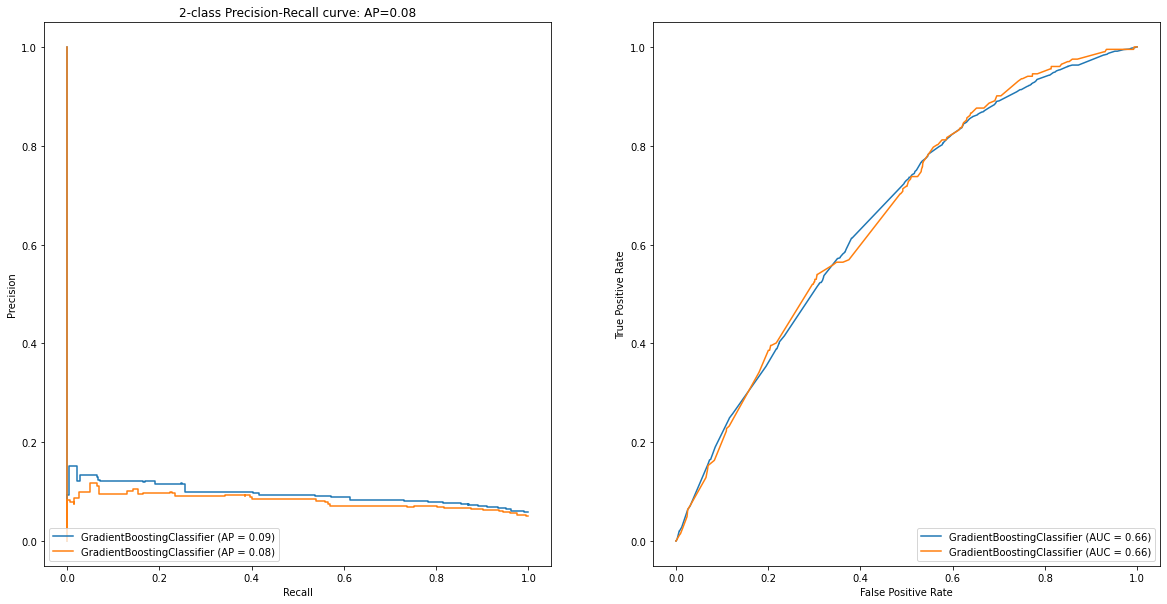

Gini on Traning data: 0.32
Gini on test data: 0.32


In [198]:

y_score = clf.predict_proba(X_train)[:,1]
dif =((y_train.sum()-y_score.sum()))
#     Mean accuracy = clf.score(X_train,y_train)
print('{} Upsampled'.format(name))
print('Train Difference: {}'.format((y_train.sum()-y_score.sum())))
print('{}: Actual {} vs Expected {}'.format(name,y_train.sum(), y_score.sum()))
print('Accuracy: {}'.format(clf.score(X_train,y_train)))

fig, axes = plt.subplots(1, 2, figsize=(20,10))

average_precision = average_precision_score(y_train, y_score)
disp = plot_precision_recall_curve(clf, X_train, y_train, ax=axes[0])
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
#     plt.show()

y_score = clf.predict_proba(X_test)[:,1]
print('Test Difference: {}'.format((y_test.sum()-y_score.sum())))
print('{}: Actual {} vs Expected {}'.format(name,y_test.sum(), y_score.sum()))
print('Accuracy: {}'.format(clf.score(X_test,y_test)))
print('\n')

average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(clf, X_test, y_test, ax=axes[0])
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

disp = plot_roc_curve(clf, X_train, y_train, ax=axes[1])
trained_gini = (2 * disp.roc_auc) - 1
disp = plot_roc_curve(clf, X_test, y_test, ax=axes[1])
test_gini = (2 * disp.roc_auc) - 1



plt.show()
print('Gini on Traning data: {0:0.2f}'.format(trained_gini))
print('Gini on test data: {0:0.2f}'.format(test_gini))

## Score up Paidy dataset

In [48]:
paidy_hist_df['pd'] = clf.predict_proba(paidy_hist_df[inputs])[:,1]
paidy_hist_df
paidy_hist_df['flag_default'].sum() , paidy_hist_df['pd'].sum()


(1127, 1127.117101384631)

## Actual Profit

In [49]:
# # Calculate fees
# #Payment fee
# paidy_hist_df['payment_fee'] = np.where(paidy_hist_df['flag_default'] == 0,(paidy_hist_df['amount']*0.025),0)

# #Conveni fee income
# convenience_store_fee = 200
# convenience_store_pay_pct = 0.8 #Will have to be adjusted is we can get more specific information
# paidy_hist_df['convenience_store_fee'] = np.where(paidy_hist_df['flag_default'] == 0,(convenience_store_fee*convenience_store_pay_pct),0)

# #collection cost
# collection_fee = 300
# paidy_hist_df['collection_fee'] = np.where(paidy_hist_df['flag_default'] == 1,(collection_fee),0)
# paidy_hist_df['credit_loss'] = paidy_hist_df['flag_default']*paidy_hist_df['amount']*0.975


# paidy_hist_df['actual_profit'] = paidy_hist_df['payment_fee'] + paidy_hist_df['convenience_store_fee'] - paidy_hist_df['credit_loss'] - paidy_hist_df['collection_fee']

# paidy_hist_df

## Expected Profit

In [50]:
# # Calculate fees
# #Payment fee = proabaility of paying* amount* fee rate
# payment_fee_rate = 0.025
# paidy_hist_df['expected_payment_fee'] = (1-paidy_hist_df['pd']) * paidy_hist_df['amount'] * payment_fee_rate

# # Conveni fee income
# convenience_store_fee = 200
# convenience_store_pay_pct = 0.8 #Will have to be adjusted is we can get more specific information on demographics who pay
# # fee = proabaility of paying * chance you pay at conveni * convine fee
# paidy_hist_df['expected_convenience_store_fee'] = (1-paidy_hist_df['pd']) * convenience_store_fee * convenience_store_pay_pct


# #collection cost
# # fee = probability of default * collection fee 
# collection_fee = 300
# paidy_hist_df['expected_collection_fee'] = paidy_hist_df['pd'] * collection_fee

# #Credit loss
# # EAD is the money that actually leave spendy on sale
# # amount * EAD
# EAD_coeff = 0.975
# paidy_hist_df['EAD'] = EAD_coeff * paidy_hist_df['amount'] # this is the money that actualy leave spendy, contracy to email but just a namin convention

# # LGD if the portion that is unrecoverable
# LGD_coeff = 1
# paidy_hist_df['LGD'] = LGD_coeff # no recovery infomation provided assume everything is lost

# #Credit loss = probability of default * exposure at default * loss given default
# paidy_hist_df['expected_credit_loss'] = paidy_hist_df['pd'] * paidy_hist_df['EAD'] * paidy_hist_df['LGD']

# #profit = income from payment fee + income from convinece store payments - cost of collection activity - credit loss
# paidy_hist_df['expected_profit'] = paidy_hist_df['expected_payment_fee'] + paidy_hist_df['expected_convenience_store_fee'] - paidy_hist_df['expected_collection_fee'] - paidy_hist_df['expected_credit_loss']

# paidy_hist_df

In [158]:
def calculate_profit(df,pd,profit_type
                     ,payment_fee_rate = 0.025
                     ,convenience_store_fee = 200
                     ,convenience_store_pay_pct = 0.8
                     ,collection_fee = 300
                     ,EAD_coeff = 0.975
                     ,LGD_coeff = 1
                     ,balance = 'amount'
                    ):

    # Calculate fees
    #Payment fee = proabaility of paying* amount* fee rate
    payment_fee_col = '{}payment_fee'.format(profit_type)
    payment_fee_factor_col = '{}pay_fee_factor'.format(profit_type)
    df[payment_fee_factor_col] = (1-df[pd]) * payment_fee_rate
    df[payment_fee_col] = df[payment_fee_factor_col] * df[balance]

    # Conveni fee income
    # fee = proabaility of paying * chance you pay at conveni * convine fee
    convenience_store_fee_col = '{}convenience_store_fee'.format(profit_type)
    df[convenience_store_fee_col] = (1-df[pd]) * convenience_store_fee * convenience_store_pay_pct


    #collection cost
    # fee = probability of default * collection fee 
    collection_fee_col = '{}collection_fee'.format(profit_type)
    df[collection_fee_col] = df[pd] * collection_fee

    #Credit loss
    # EAD is the money that actually leave spendy on sale
    # amount * EAD
    ead_col = '{}EAD'.format(profit_type)
    df[ead_col] = EAD_coeff  # this is the money that actualy leave spendy, contracy to email but just a namin convention

    # LGD if the portion that is unrecoverable
    lgd_col = '{}LGD'.format(profit_type)
    df[lgd_col] = LGD_coeff # no recovery infomation provided assume everything is lost

    #Credit loss factor = probability of default * exposure at default * loss given default
    credit_loss_factor_col = '{}CLF'.format(profit_type)
    df[credit_loss_factor_col] = df[pd] * df[ead_col] * df[lgd_col]
    
    #Credit loss = Credit loss Factor * balance
    credit_loss_col = '{}credit_loss'.format(profit_type)
    df[credit_loss_col] = df[credit_loss_factor_col] * df[balance]

    #profit = income from payment fee + income from convinece store payments - cost of collection activity - credit loss
    profit_col = '{}profit'.format(profit_type)
    df[profit_col] = df[payment_fee_col] + df[convenience_store_fee_col] - df[collection_fee_col] - df[credit_loss_col]
    return

calculate_profit(paidy_hist_df,'pd','expected_')
calculate_profit(paidy_hist_df,'flag_default','actual_')
# paidy_hist_df = paidy_hist_df.drop(['actual_profit','expected_profit'],axis=1)
paidy_hist_df

,customer_id,amount,has_points_card,high_risk_item,flag_default,amount_bin,browser_type_computer,browser_type_mobile,browser_type_other,item_category_electronics,...,limit_test_convenience_store_fee,limit_test_collection_fee,limit_test_EAD,limit_test_LGD,limit_test_CLF,limit_test_credit_loss,limit_test_profit,customer_limit,expected_pay_fee_factor,actual_pay_fee_factor
0,1,2849,0,0,0,2850,1,0,0,0,...,154.069417,11.119843,0.975,1,0.036139,128.638910,100.0,3550.0,0.024073,0.025
1,2,3699,0,0,0,3700,1,0,0,0,...,156.134966,7.246939,0.975,1,0.023553,-1365.013601,100.0,-58000.0,0.024396,0.025
2,3,2714,0,0,0,2750,0,1,0,1,...,138.509500,40.294687,0.975,1,0.130958,-2.138614,100.0,-50.0,0.021642,0.025
3,4,2980,0,0,1,3000,0,1,0,0,...,148.368373,21.809301,0.975,1,0.070880,39.467612,100.0,550.0,0.023183,0.000
4,5,1595,0,0,0,1600,1,0,0,1,...,145.194005,27.761240,0.975,1,0.090224,23.288618,100.0,250.0,0.022687,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2754,0,0,0,2800,0,0,1,0,...,157.245982,5.163783,0.975,1,0.016782,-112.240298,100.0,-6700.0,0.024570,0.025
19996,19997,1902,0,0,0,1950,1,0,0,0,...,154.359579,10.575790,0.975,1,0.034371,146.782453,100.0,4250.0,0.024119,0.025
19997,19998,838,0,0,0,850,0,0,1,0,...,152.132512,14.751540,0.975,1,0.047943,74.141661,100.0,1500.0,0.023771,0.025
19998,19999,788,0,0,1,800,0,1,0,0,...,152.900879,13.310852,0.975,1,0.043260,88.421205,100.0,2000.0,0.023891,0.000


In [52]:
paidy_hist_df['expected_profit'].mean() , paidy_hist_df['actual_profit'].mean()

(-77.38993118504662, -574.2514812500093)

In [72]:
paidy_hist_df['expected_profit'].std() , paidy_hist_df['actual_profit'].std()

(709.6878949155546, 8676.200053167877)

# Policy 1. Don't lend to customers who are expected to lose money.

In [53]:
paidy_hist_df['Decison'] = np.where(paidy_hist_df['expected_profit'] >= 0,'Accept','Decline')
paidy_hist_df

,customer_id,amount,has_points_card,high_risk_item,flag_default,amount_bin,browser_type_computer,browser_type_mobile,browser_type_other,item_category_electronics,...,expected_profit,actual_payment_fee,actual_convenience_store_fee,actual_collection_fee,actual_EAD,actual_LGD,actual_CLF,actual_credit_loss,actual_profit,Decison
0,1,2849,0,0,0,2850,1,0,0,0,...,108.573126,71.225,160.0,0,0.975,1,0.000,0.0,231.225,Accept
1,2,3699,0,0,0,3700,1,0,0,0,...,152.008265,92.475,160.0,0,0.975,1,0.000,0.0,252.475,Accept
2,3,2714,0,0,0,2750,0,1,0,1,...,-198.467785,67.850,160.0,0,0.975,1,0.000,0.0,227.850,Decline
3,4,2980,0,0,1,3000,0,1,0,0,...,-15.579980,0.000,0.0,300,0.975,1,0.975,2905.5,-3205.500,Decline
4,5,1595,0,0,0,1600,1,0,0,1,...,9.710504,39.875,160.0,0,0.975,1,0.000,0.0,199.875,Accept
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2754,0,0,0,2800,0,0,1,0,...,173.528668,68.850,160.0,0,0.975,1,0.000,0.0,228.850,Accept
19996,19997,1902,0,0,0,1950,1,0,0,0,...,124.283283,47.550,160.0,0,0.975,1,0.000,0.0,207.550,Accept
19997,19998,838,0,0,0,850,0,0,1,0,...,117.125003,20.950,160.0,0,0.975,1,0.000,0.0,180.950,Accept
19998,19999,788,0,0,1,800,0,1,0,0,...,124.326854,0.000,0.0,300,0.975,1,0.975,768.3,-1068.300,Accept


In [200]:
paidy_hist_df[['customer_id','amount','pd','expected_profit']]

,customer_id,amount,pd,expected_profit
0,1,2849,0.037066,108.573126
1,2,3699,0.024156,152.008265
2,3,2714,0.134316,-198.467785
3,4,2980,0.072698,-15.579980
4,5,1595,0.092537,9.710504
...,...,...,...,...
19995,19996,2754,0.017213,173.528668
19996,19997,1902,0.035253,124.283283
19997,19998,838,0.049172,117.125003
19998,19999,788,0.044370,124.326854


In [54]:
paidy_hist_df[paidy_hist_df['Decison'] == 'Accept'].mean()[['expected_profit','actual_profit']]

expected_profit    102.918062
actual_profit       54.310501
dtype: float64

In [71]:
paidy_hist_df[paidy_hist_df['Decison'] == 'Accept'].std()[['expected_profit','actual_profit']]

expected_profit      51.550751
actual_profit      3446.704171
dtype: float64

# What should the limit be?

The limit should the the maximum amount of cash a customer can 'borrow' while still being expected to be profitable. 
So by rearanging the expected profit equation we can calulate solve for this amount.

<b>NB The PD has to be calculated independetly of the amount borrowed to allow this to be possible, otherwise some correction would be needed. Which will complicate the calculation. This may or maynot be worth while.</b>

expected profit = (income from payment fee) + (income from convinece store payments) - (cost of collection activity) - (credit loss)

expected profit = ((1- Probaility of default) * amount * fee rate) + ((1- Probaility of default) * chance you pay at conveni * convine fee) - (probability of default * collection fee) - (probability of default * exposure at default * loss given default)

expected profit = ((1- Probaility of default) * amount * fee rate) + ((1- Probaility of default) * chance you pay at conveni * convine fee) - (probability of default * collection fee) - (probability of default * (amount * ead_coeff) * loss given default)

expected profit - ((1- Probaility of default) * chance you pay at conveni * convine fee) + (probability of default * collection fee)  = ((1- Probaility of default) * amount * fee rate) - (probability of default * (amount * ead_coeff) * loss given default)

expected profit - ((1- Probaility of default) * chance you pay at conveni * convine fee) + (probability of default * collection fee)  = amount*(((1- Probaility of default) * fee rate) - (probability of default * (ead_coeff) * loss given default))

(expected profit - ((1- Probaility of default) * chance you pay at conveni * convine fee) + (probability of default * collection fee))/((((1- Probaility of default) * fee rate) - (probability of default * (ead_coeff) * loss given default)))  = amount

### Calculation of limit
EX = expected profit

P<sub>con</sub> = probability you pay at conveni
Fee<sub>con</sub> = convine fee

Fee<sub>coll</sub> = collection fee

R<sub>fee</sub> = fee rate

PD = probability of default

EAD = Exposure at Default Coefficent

LGD = loss given default

Amount = cost of goods

EX = (income from payment fee) + (income from convinece store payments) - (cost of collection activity) - (credit loss)

EX = ((1- PD) * Amount * R<sub>fee</sub>) + ((1- PD) * P<sub>con</sub> * Fee<sub>con</sub>) - (PD * Fee<sub>coll</sub>) - (PD * Exposure at default * LGD)

EX = ((1- PD) * Amount * R<sub>fee</sub>) + ((1- PD) * P<sub>con</sub> * Fee<sub>con</sub>) - (PD * Fee<sub>coll</sub>) - (PD * (Amount * EAD) * LGD)

EX - ((1- PD) * P<sub>con</sub> * Fee<sub>con</sub>) + (PD * Fee<sub>coll</sub>)  = ((1- PD) * Amount * R<sub>fee</sub>) - (PD * (Amount * EAD) * LGD)

EX - ((1- PD) * P<sub>con</sub> * Fee<sub>con</sub>) + (PD * Fee<sub>coll</sub>)  = Amount*(((1- PD) * R<sub>fee</sub>) - (PD * (EAD) * LGD))

(EX - ((1- PD) * P<sub>con</sub> * Fee<sub>con</sub>) + (PD * Fee<sub>coll</sub>))/((((1- PD) * R<sub>fee</sub>) - (PD * (EAD) * LGD)))  = Limit


# What should the buffer be?

EX represents the average profit that we expect to make for a given account, setting this to 0 will maximise the limit while not making a loss.

Applying Policy 1 we can calculate the average expected profitability for those customer we expected to make money with. 

<u> Average </u> 
expected_profit    102.918062
actual_profit       54.310501

*Standar Deviation*
expected_profit      51.550751
actual_profit      3446.704171

From the data we can see we need to build in some slack due to the difference in the expected profit and the actual profit. This difference can be attributed to the variance around the mean calculated ie some account make less than the mean some accounts make more. By setting a buffer of aprox twice standard deviation of the expected profit we can ensure that >95% of the account from our sample will be profitable. 

This is proabaly a good buffer to have.

**NB This is assuming the profitability is normally distibuted. We can see this is not the case given profit is a reletivly linear tranformation the amount borrowed and we saw above this is skewed to the lower end of range. So we maybe being overly conservative. **

We can now solve for limit:


In [176]:
# (expected profit - ((1- Probaility of default) * chance you pay at conveni * convine fee) + (probability of default * collection fee))/((((1- Probaility of default) * fee rate) - (probability of default * (ead_coeff) * loss given default))) = amount

exp_profit = 100
payment_fee_rate = 0.025
convenience_store_fee = 200
convenience_store_pay_pct = 0.8
collection_fee = 300
EAD_coeff = 0.975
LGD_coeff = 1

def calculate_limit(df):
    df['numerator'] = (exp_profit - df['expected_convenience_store_fee'] + df['expected_collection_fee'])
    df['denominator'] = ((((1 - df['pd']) * payment_fee_rate) - (df['pd'] * EAD_coeff * LGD_coeff)))
    df['limit'] = df['numerator']/df['denominator']
    
    #for some customer there PD is so low that there varible revenue (denominator) will always positive. For thes customer set limit to 300k 
    #It can be proven that the denominator wil never be 0 for positive value of EAD,LGD, payment_fee_rate
    df['limit'] = np.where(df['denominator'] >= 0,300000, df['limit'])
    
    #Since limits are customer we will round them down to the nearest 50 for astetic purposes
    df['customer_limit'] = np.floor(df['limit']/50)*50
    
calculate_limit(paidy_hist_df)
paidy_hist_df['amount_0'] = 0
paidy_hist_df['amount_10k'] = 10000
paidy_hist_df['amount_1000k'] = 1000000
paidy_hist_df

,customer_id,amount,has_points_card,high_risk_item,flag_default,amount_bin,browser_type_computer,browser_type_mobile,browser_type_other,item_category_electronics,...,limit_test_collection_fee,limit_test_EAD,limit_test_LGD,limit_test_CLF,limit_test_credit_loss,limit_test_profit,customer_limit,expected_pay_fee_factor,actual_pay_fee_factor,limit_test_pay_fee_factor
0,1,2849,0,0,0,2850,1,0,0,0,...,11.119843,0.975,1,0.036139,278.394658,50.000000,3550.0,0.024073,0.025,0.024073
1,2,3699,0,0,0,3700,1,0,0,0,...,7.246939,0.975,1,0.023553,7065.765784,401.948761,300000.0,0.024396,0.025,0.024396
2,3,2714,0,0,0,2750,0,1,0,1,...,40.294687,0.975,1,0.130958,57.760296,50.000000,-50.0,0.021642,0.025,0.021642
3,4,2980,0,0,1,3000,0,1,0,0,...,21.809301,0.975,1,0.070880,113.769175,50.000000,550.0,0.023183,0.000,0.023183
4,5,1595,0,0,0,1600,1,0,0,1,...,27.761240,0.975,1,0.090224,90.084157,50.000000,250.0,0.022687,0.025,0.022687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,2754,0,0,0,2800,0,0,1,0,...,5.163783,0.975,1,0.016782,5034.688707,2488.298909,300000.0,0.024570,0.025,0.024570
19996,19997,1902,0,0,0,1950,1,0,0,0,...,10.575790,0.975,1,0.034371,314.404370,50.000000,4250.0,0.024119,0.025,0.024119
19997,19998,838,0,0,0,850,0,0,1,0,...,14.751540,0.975,1,0.047943,173.311984,50.000000,1500.0,0.023771,0.025,0.023771
19998,19999,788,0,0,1,800,0,1,0,0,...,13.310852,0.975,1,0.043260,200.092265,50.000000,2000.0,0.023891,0.000,0.023891


In [177]:
drop_cols = [x for x in paidy_hist_df.columns.to_list() if 0\
#              or ('limit_' in x)\
             or('actual_' in x)\
             or('expected_' in x)\
            ]
paidy_hist_df[paidy_hist_df['denominator'] > 0].drop(drop_cols+inputs+['amount_10k']+['amount_0']+['amount_1000k']+['customer_id']+['convenience_store_fee']+['collection_fee'],axis=1)

,amount,flag_default,amount_bin,payment_fee,credit_loss,profit,pd,Decison,numerator,demoninator,...,limit_test_payment_fee,limit_test_convenience_store_fee,limit_test_collection_fee,limit_test_EAD,limit_test_LGD,limit_test_CLF,limit_test_credit_loss,limit_test_profit,customer_limit,limit_test_pay_fee_factor
1,3699,0,3700,92.475,0.0,252.475,0.024156,Accept,-48.888026,0.000844,...,7318.826518,156.134966,7.246939,0.975,1,0.023553,7065.765784,401.948761,300000.0,0.024396
5,2174,0,2200,54.350,0.0,214.350,0.024156,Accept,-48.888026,0.000844,...,7318.826518,156.134966,7.246939,0.975,1,0.023553,7065.765784,401.948761,300000.0,0.024396
9,1437,0,1450,35.925,0.0,195.925,0.022805,Accept,-49.509499,0.002195,...,7328.959224,156.351130,6.841631,0.975,1,0.022235,6670.590253,807.878470,300000.0,0.024430
11,500,0,500,12.500,0.0,172.500,0.024156,Accept,-48.888026,0.000844,...,7318.826518,156.134966,7.246939,0.975,1,0.023553,7065.765784,401.948761,300000.0,0.024396
12,2298,0,2300,57.450,0.0,217.450,0.020468,Accept,-50.584746,0.004532,...,7346.490416,156.725129,6.140383,0.975,1,0.019956,5986.873780,1510.201381,300000.0,0.024488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,1273,0,1300,31.825,0.0,191.825,0.024156,Accept,-48.888026,0.000844,...,7318.826518,156.134966,7.246939,0.975,1,0.023553,7065.765784,401.948761,300000.0,0.024396
19973,3839,0,3850,95.975,0.0,255.975,0.020077,Accept,-50.764548,0.004923,...,7349.421974,156.787669,6.023121,0.975,1,0.019575,5872.543033,1627.643488,300000.0,0.024498
19977,2018,0,2050,50.450,0.0,210.450,0.024156,Accept,-48.888026,0.000844,...,7318.826518,156.134966,7.246939,0.975,1,0.023553,7065.765784,401.948761,300000.0,0.024396
19995,2754,0,2800,68.850,0.0,228.850,0.017213,Accept,-52.082199,0.007787,...,7370.905418,157.245982,5.163783,0.975,1,0.016782,5034.688707,2488.298909,300000.0,0.024570


In [178]:
calculate_profit(paidy_hist_df,'pd','limit_test_',balance='limit')
# paidy_hist_df.drop(inputs,axis=1)
drop_cols = [x for x in paidy_hist_df.columns.to_list() if 0\
#              or ('limit_' in x)\
             or('actual_' in x)\
             or('expected_' in x)\
            ]
drop_cols
paidy_hist_df.drop(drop_cols+inputs+['amount_10k']+['amount_0']+['amount_1000k']+['customer_id']+['convenience_store_fee']+['collection_fee'],axis=1)


,amount,flag_default,amount_bin,payment_fee,credit_loss,profit,pd,Decison,numerator,demoninator,...,limit_test_payment_fee,limit_test_convenience_store_fee,limit_test_collection_fee,limit_test_EAD,limit_test_LGD,limit_test_CLF,limit_test_credit_loss,limit_test_profit,customer_limit,limit_test_pay_fee_factor
0,2849,0,2850,71.225,0.0,231.225,0.037066,Accept,-42.949573,-0.012066,...,85.689337,154.069417,11.119843,0.975,1,0.036139,128.638910,100.000000,3550.0,0.024073
1,3699,0,3700,92.475,0.0,252.475,0.024156,Accept,-48.888026,0.000844,...,7318.826518,156.134966,7.246939,0.975,1,0.023553,7065.765784,401.948761,300000.0,0.024396
2,2714,0,2750,67.850,0.0,227.850,0.134316,Decline,1.785186,-0.109316,...,-0.353428,138.509500,40.294687,0.975,1,0.130958,-2.138614,100.000000,-50.0,0.021642
3,2980,1,3000,74.500,2905.5,-3131.000,0.072698,Decline,-26.559072,-0.047698,...,12.908540,148.368373,21.809301,0.975,1,0.070880,39.467612,100.000000,550.0,0.023183
4,1595,0,1600,39.875,0.0,199.875,0.092537,Decline,-17.432765,-0.067537,...,5.855854,145.194005,27.761240,0.975,1,0.090224,23.288618,100.000000,250.0,0.022687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2754,0,2800,68.850,0.0,228.850,0.017213,Accept,-52.082199,0.007787,...,7370.905418,157.245982,5.163783,0.975,1,0.016782,5034.688707,2488.298909,300000.0,0.024570
19996,1902,0,1950,47.550,0.0,207.550,0.035253,Accept,-43.783789,-0.010253,...,102.998664,154.359579,10.575790,0.975,1,0.034371,146.782453,100.000000,4250.0,0.024119
19997,838,0,850,20.950,0.0,180.950,0.049172,Accept,-37.380972,-0.024172,...,36.760689,152.132512,14.751540,0.975,1,0.047943,74.141661,100.000000,1500.0,0.023771
19998,788,1,800,19.700,768.3,-1048.600,0.044370,Accept,-39.590026,-0.019370,...,48.831178,152.900879,13.310852,0.975,1,0.043260,88.421205,100.000000,2000.0,0.023891


# Policy 2. Don't lend more money to customer than their limit.

In [174]:
print('Accept Rate at 50 yen buffer')
# paidy_hist_df['Decison'] = np.where(paidy_hist_df['customer_limit'] >= paidy_hist_df['amount'],'Accept','Decline')
# paidy_hist_df['Decison'].value_counts()

Accept Rate at 50 yen buffer


Accept     11520
Decline     8480
Name: Decison, dtype: int64

In [175]:
print('Profit at 50 yen buffer')
# paidy_hist_df[paidy_hist_df['Decison'] == 'Accept'].mean()[['expected_profit','actual_profit']]


Profit at 50 yen buffer


expected_profit    118.178802
actual_profit       56.733149
dtype: float64

In [179]:
print('Accept Rate at 100 yen buffer')
paidy_hist_df['Decison'] = np.where(paidy_hist_df['customer_limit'] >= paidy_hist_df['amount'],'Accept','Decline')
paidy_hist_df['Decison'].value_counts()

Accept Rate at 100 yen buffer


Decline    12301
Accept      7699
Name: Decison, dtype: int64

In [180]:
print('Profit at 100 yen buffer')
paidy_hist_df[paidy_hist_df['Decison'] == 'Accept'].mean()[['expected_profit','actual_profit']]


Profit at 100 yen buffer


expected_profit    138.35818
actual_profit      118.92878
dtype: float64

# Score Up New Data
## Import New Data

In [122]:
df2 = pd.read_excel('Risk and analytics credit risk analyst exercise.xlsx',sheet_name = 'New Data')
cols = [col for col in df2 if not col.startswith('Unnamed:')]
print (cols)
New_data = df2[cols]
New_data

['customer_id', 'amount', 'browser_type', 'has_points_card', 'high_risk_item', 'merchant_customer_age', 'item_category', 'purchase_time', 'age_range']


,customer_id,amount,browser_type,has_points_card,high_risk_item,merchant_customer_age,item_category,purchase_time,age_range
0,20001,4900,computer,NaN,NaN,6,fashion,12pm to 6pm,25-35
1,20002,787,computer,yes,NaN,0,electronics,12pm to 6pm,25-35
2,20003,500,other,yes,NaN,5,household,12pm to 6pm,15-25
3,20004,14991,computer,yes,NaN,0,electronics,12pm to 6pm,15-25
4,20005,58310,mobile,yes,NaN,5,household,12am to 6am,35-45
...,...,...,...,...,...,...,...,...,...
9995,29996,1254,mobile,yes,NaN,7,fashion,12pm to 6pm,15-25
9996,29997,19987,mobile,yes,NaN,4,fashion,12pm to 6pm,15-25
9997,29998,400,computer,yes,NaN,0,fashion,6pm to 12am,35-45
9998,29999,2356,other,yes,NaN,4,fashion,6pm to 12am,15-25


## Carry out preprocessing

In [123]:
#pre processing
New_data['has_points_card'] = np.where(New_data['has_points_card']=='yes',1,0) ##only run this once or you will overwitre everything
New_data['high_risk_item'] = np.where(New_data['high_risk_item']=='yes',1,0) ##only run this once or you will overwitre everything

# #One hot encoding
New_data = pd.get_dummies(New_data, columns=['browser_type','item_category','purchase_time','merchant_customer_age','age_range'])
New_data

,customer_id,amount,has_points_card,high_risk_item,browser_type_computer,browser_type_mobile,browser_type_other,item_category_electronics,item_category_fashion,item_category_food,...,merchant_customer_age_3,merchant_customer_age_4,merchant_customer_age_5,merchant_customer_age_6,merchant_customer_age_7,age_range_15-25,age_range_25-35,age_range_35-45,age_range_45-55,age_range_55+
0,20001,4900,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,20002,787,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,20003,500,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,20004,14991,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,20005,58310,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29996,1254,1,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
9996,29997,19987,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
9997,29998,400,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9998,29999,2356,1,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0


## Calculate PD for new Data

In [130]:
new_data_inputs = ['has_points_card', 'high_risk_item', 'browser_type_computer',
       'browser_type_mobile', 'browser_type_other',
       'item_category_electronics', 'item_category_fashion',
       'item_category_food', 'item_category_household',
       'purchase_time_12am to 6am', 'purchase_time_12pm to 6pm',
       'purchase_time_6am to 12pm', 'purchase_time_6pm to 12am',
       'merchant_customer_age_0', 'merchant_customer_age_1',
       'merchant_customer_age_2', 'merchant_customer_age_3',
       'merchant_customer_age_4', 'merchant_customer_age_5',
       'merchant_customer_age_6', 'merchant_customer_age_7', 'age_range_15-25',
       'age_range_25-35', 'age_range_35-45', 'age_range_45-55',
       'age_range_55+']


New_data['pd'] = clf.predict_proba(New_data[new_data_inputs])[:,1]
New_data

,customer_id,amount,has_points_card,high_risk_item,browser_type_computer,browser_type_mobile,browser_type_other,item_category_electronics,item_category_fashion,item_category_food,...,merchant_customer_age_4,merchant_customer_age_5,merchant_customer_age_6,merchant_customer_age_7,age_range_15-25,age_range_25-35,age_range_35-45,age_range_45-55,age_range_55+,pd
0,20001,4900,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0.022200
1,20002,787,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.083124
2,20003,500,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0.024723
3,20004,14991,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.083124
4,20005,58310,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0.049212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29996,1254,1,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0.030494
9996,29997,19987,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0.044370
9997,29998,400,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0.064896
9998,29999,2356,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0.033302


In [194]:
expected_defaults = New_data['pd'].sum()
print('Expected Defaults: {0:0.0f}'.format(expected_defaults))

Expected Defaults: 566


## Calculate Limit

In [184]:
def calculate_profit(df,pd,profit_type
                     ,payment_fee_rate = 0.025
                     ,convenience_store_fee = 200
                     ,convenience_store_pay_pct = 0.8
                     ,collection_fee = 300
                     ,EAD_coeff = 0.975
                     ,LGD_coeff = 1
                     ,balance = 'amount'
                    ):

    # Calculate fees
    #Payment fee = proabaility of paying* amount* fee rate
    payment_fee_col = '{}payment_fee'.format(profit_type)
    payment_fee_factor_col = '{}pay_fee_factor'.format(profit_type)
    df[payment_fee_factor_col] = (1-df[pd]) * payment_fee_rate
    df[payment_fee_col] = df[payment_fee_factor_col] * df[balance]

    # Conveni fee income
    # fee = proabaility of paying * chance you pay at conveni * convine fee
    convenience_store_fee_col = '{}convenience_store_fee'.format(profit_type)
    df[convenience_store_fee_col] = (1-df[pd]) * convenience_store_fee * convenience_store_pay_pct


    #collection cost
    # fee = probability of default * collection fee 
    collection_fee_col = '{}collection_fee'.format(profit_type)
    df[collection_fee_col] = df[pd] * collection_fee

    #Credit loss
    # EAD is the money that actually leave spendy on sale
    # amount * EAD
    ead_col = '{}EAD'.format(profit_type)
    df[ead_col] = EAD_coeff  # this is the money that actualy leave spendy, contracy to email but just a namin convention

    # LGD if the portion that is unrecoverable
    lgd_col = '{}LGD'.format(profit_type)
    df[lgd_col] = LGD_coeff # no recovery infomation provided assume everything is lost

    #Credit loss factor = probability of default * exposure at default * loss given default
    credit_loss_factor_col = '{}CLF'.format(profit_type)
    df[credit_loss_factor_col] = df[pd] * df[ead_col] * df[lgd_col]
    
    #Credit loss = Credit loss Factor * balance
    credit_loss_col = '{}credit_loss'.format(profit_type)
    df[credit_loss_col] = df[credit_loss_factor_col] * df[balance]

    #profit = income from payment fee + income from convinece store payments - cost of collection activity - credit loss
    profit_col = '{}profit'.format(profit_type)
    df[profit_col] = df[payment_fee_col] + df[convenience_store_fee_col] - df[collection_fee_col] - df[credit_loss_col]
    return

calculate_profit(New_data,'pd','expected_')


def calculate_limit(df):
    df['numerator'] = (exp_profit - df['expected_convenience_store_fee'] + df['expected_collection_fee'])
    df['denominator'] = ((((1 - df['pd']) * payment_fee_rate) - (df['pd'] * EAD_coeff * LGD_coeff)))
    df['limit'] = df['numerator']/df['denominator']
    
    #for some customer there PD is so low that there varible revenue (denominator) will always positive. For thes customer set limit to 300k 
    #It can be proven that the denominator wil never be 0 for positive value of EAD,LGD, payment_fee_rate
    df['limit'] = np.where(df['denominator'] >= 0,300000, df['limit'])
    
    #Since limits are customer we will round them down to the nearest 50 for astetic purposes
    df['customer_limit'] = np.floor(df['limit']/50)*50
    df = df.drop(['numerator','denominator'],axis = 1)
    return
    
calculate_limit(New_data)

# inputs = [x for x in df_upsampled.columns.to_list() if x not in not_at_decison]
New_data[(x for x in New_data.columns.to_list() if x not in new_data_inputs)]

,customer_id,amount,pd,expected_payment_fee,expected_convenience_store_fee,expected_collection_fee,expected_EAD,expected_LGD,expected_CLF,expected_credit_loss,expected_profit,limit,customer_limit,expected_pay_fee_factor,numerator,denominator
0,20001,4900,0.022200,119.780504,156.448005,6.659991,0.975,1,0.021645,106.060350,163.508168,300000.000000,300000.0,0.024445,-49.788014,0.002800
1,20002,787,0.083124,18.039534,146.700146,24.937227,0.975,1,0.081046,63.783191,76.019262,374.421689,350.0,0.022922,-21.762919,-0.058124
2,20003,500,0.024723,12.190968,156.044395,7.416760,0.975,1,0.024104,12.052235,148.766368,300000.000000,300000.0,0.024382,-48.627635,0.000277
3,20004,14991,0.083124,343.622170,146.700146,24.937227,0.975,1,0.081046,1214.960379,-749.575290,374.421689,350.0,0.022922,-21.762919,-0.058124
4,20005,58310,0.049212,1386.011761,152.126141,14.763486,0.975,1,0.047981,2797.791337,-1274.416921,1543.170359,1500.0,0.023770,-37.362655,-0.024212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29996,1254,0.030494,30.394000,155.120895,9.148322,0.975,1,0.029732,37.283985,139.082589,8367.160874,8350.0,0.024238,-45.972574,-0.005494
9996,29997,19987,0.044370,477.504666,152.900879,13.310852,0.975,1,0.043260,864.643025,-247.548333,2043.935550,2000.0,0.023891,-39.590026,-0.019370
9997,29998,400,0.064896,9.351044,149.616707,19.468675,0.975,1,0.063273,25.309278,114.189798,755.673404,750.0,0.023378,-30.148032,-0.039896
9998,29999,2356,0.033302,56.938501,154.671649,9.990658,0.975,1,0.032470,76.498471,125.121021,5381.829028,5350.0,0.024167,-44.680991,-0.008302


In [197]:
total_profit = New_data['expected_profit'].sum()
mean_profit = New_data['expected_profit'].mean()
print('Profitabiliy based on 100% approval:')
print('Total Expected Profit: {0:0.0f} Yen'.format(total_profit))
print('Mean Expected Profit: {0:0.0f} Yen'.format(mean_profit))

Profitabiliy based on 100% approval:
Total Expected Profit: -743456 Yen
Mean Expected Profit: -74 Yen


# Apply Policy: Don't lend more money to a customer than their limit.

In [186]:
print('Accept Rate')
New_data['Decison'] = np.where(New_data['customer_limit'] >= New_data['amount'],'Accept','Decline')
New_data['Decison'].value_counts()

Accept Rate


Decline    6213
Accept     3787
Name: Decison, dtype: int64

In [196]:

total_profit = New_data[New_data['Decison'] == 'Accept']['expected_profit'].sum()
mean_profit = New_data[New_data['Decison'] == 'Accept']['expected_profit'].mean()
print('Profitabiliy with new policy:')
print('Total Expected Profit: {0:0.0f} Yen'.format(total_profit))
print('Mean Expected Profit: {0:0.0f} Yen'.format(mean_profit))


Profitabiliy with new policy:
Total Expected Profit: 523791 Yen
Mean Expected Profit: 138 Yen


In [185]:
check = New_data.copy()
calculate_profit(check,'pd','limit_test_',balance='limit')
# check
check[(x for x in check.columns.to_list() if x not in new_data_inputs)]

,customer_id,amount,pd,expected_payment_fee,expected_convenience_store_fee,expected_collection_fee,expected_EAD,expected_LGD,expected_CLF,expected_credit_loss,...,denominator,limit_test_pay_fee_factor,limit_test_payment_fee,limit_test_convenience_store_fee,limit_test_collection_fee,limit_test_EAD,limit_test_LGD,limit_test_CLF,limit_test_credit_loss,limit_test_profit
0,20001,4900,0.022200,119.780504,156.448005,6.659991,0.975,1,0.021645,106.060350,...,0.002800,0.024445,7333.500235,156.448005,6.659991,0.975,1,0.021645,6493.490839,989.797410
1,20002,787,0.083124,18.039534,146.700146,24.937227,0.975,1,0.081046,63.783191,...,-0.058124,0.022922,8.582456,146.700146,24.937227,0.975,1,0.081046,30.345375,100.000000
2,20003,500,0.024723,12.190968,156.044395,7.416760,0.975,1,0.024104,12.052235,...,0.000277,0.024382,7314.580999,156.044395,7.416760,0.975,1,0.024104,7231.341032,231.867602
3,20004,14991,0.083124,343.622170,146.700146,24.937227,0.975,1,0.081046,1214.960379,...,-0.058124,0.022922,8.582456,146.700146,24.937227,0.975,1,0.081046,30.345375,100.000000
4,20005,58310,0.049212,1386.011761,152.126141,14.763486,0.975,1,0.047981,2797.791337,...,-0.024212,0.023770,36.680711,152.126141,14.763486,0.975,1,0.047981,74.043366,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,29996,1254,0.030494,30.394000,155.120895,9.148322,0.975,1,0.029732,37.283985,...,-0.005494,0.024238,202.800232,155.120895,9.148322,0.975,1,0.029732,248.772806,100.000000
9996,29997,19987,0.044370,477.504666,152.900879,13.310852,0.975,1,0.043260,864.643025,...,-0.019370,0.023891,48.831178,152.900879,13.310852,0.975,1,0.043260,88.421205,100.000000
9997,29998,400,0.064896,9.351044,149.616707,19.468675,0.975,1,0.063273,25.309278,...,-0.039896,0.023378,17.665838,149.616707,19.468675,0.975,1,0.063273,47.813870,100.000000
9998,29999,2356,0.033302,56.938501,154.671649,9.990658,0.975,1,0.032470,76.498471,...,-0.008302,0.024167,130.065058,154.671649,9.990658,0.975,1,0.032470,174.746048,100.000000


# Full data hail mary

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
# from sklearn.metrics import accuracy_score

# inputs = ['amount', 'has_points_card', 'high_risk_item', 'browser_type_computer',
#        'browser_type_mobile', 'browser_type_other',
#        'item_category_electronics', 'item_category_fashion',
#        'item_category_food', 'item_category_household',
#        'purchase_time_12am to 6am', 'purchase_time_12pm to 6pm',
#        'purchase_time_6am to 12pm', 'purchase_time_6pm to 12am',
#        'merchant_customer_age_0', 'merchant_customer_age_1',
#        'merchant_customer_age_2', 'merchant_customer_age_3',
#        'merchant_customer_age_4', 'merchant_customer_age_5',
#        'merchant_customer_age_6', 'merchant_customer_age_7', 'age_range_15-25',
#        'age_range_25-35', 'age_range_35-45', 'age_range_45-55',
#        'age_range_55+']

# scoring = {'F1_Score':'f1'}

# gs = GridSearchCV(DecisionTreeClassifier(random_state=123),
#                   param_grid={'max_depth': range(2, 12, 1),'min_samples_leaf':range(100, 1000, 50)},
#                   scoring=scoring, refit='F1_Score', return_train_score=True)
# gs.fit(paidy_hist_df[inputs],paidy_hist_df['flag_default'])
# results = gs.cv_results_
# results

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree



# clf = tree.DecisionTreeClassifier(random_state=123,max_depth= 7, min_samples_leaf= 350).fit(paidy_hist_df[inputs],paidy_hist_df['flag_default'])
# y_score = clf.predict_proba(paidy_hist_df[inputs])[:,1]
# pred = clf.predict(paidy_hist_df[inputs])
# np.unique(pred), pred


# # Setting dpi = 300 to make image clearer than default
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=500)

# tree.plot_tree(clf,
#            feature_names = inputs, 
#            filled = True)
# plt.savefig("tree.png")


In [ ]:
# name='Paidy Data in amount'

# y_score = clf.predict_proba(paidy_hist_df[inputs])[:,1]
# #     Mean accuracy = clf.score(X_train,y_train)
# print('{}'.format(name))
# print('Train Difference: {}'.format(((paidy_hist_df['flag_default'].sum()-y_score.sum()))) )
# print('{}: Actual {} vs Expected {}'.format(name, (paidy_hist_df['flag_default'].sum()), (y_score.sum())) )
# print('Accuracy: {}'.format(clf.score(paidy_hist_df[inputs],paidy_hist_df['flag_default'])))

# fig, axes = plt.subplots(1, 2, figsize=(20,10))

# average_precision = average_precision_score(paidy_hist_df['flag_default'], y_score)
# disp = plot_precision_recall_curve(clf, paidy_hist_df[inputs], paidy_hist_df['flag_default'], ax=axes[0])
# disp.ax_.set_title('2-class Precision-Recall curve: '
#                    'AP={0:0.2f}'.format(average_precision))

# disp = plot_roc_curve(clf, paidy_hist_df[inputs], paidy_hist_df['flag_default'], ax=axes[1])

# plt.show()

In [ ]:
# Score up paidy data set using PD
#ca

# What can we hope for

In [ ]:
# cats = ['has_points_card', 'high_risk_item', 'browser_type_computer',
#        'browser_type_mobile', 'browser_type_other',
#        'item_category_electronics', 'item_category_fashion',
#        'item_category_food', 'item_category_household',
#        'purchase_time_12am to 6am', 'purchase_time_12pm to 6pm',
#        'purchase_time_6am to 12pm', 'purchase_time_6pm to 12am',
#        'merchant_customer_age_0', 'merchant_customer_age_1',
#        'merchant_customer_age_2', 'merchant_customer_age_3',
#        'merchant_customer_age_4', 'merchant_customer_age_5',
#        'merchant_customer_age_6', 'merchant_customer_age_7', 'age_range_15-25',
#        'age_range_25-35', 'age_range_35-45', 'age_range_45-55',
#        'age_range_55+']


# def groups(dset,var,graph = True,label = True):
#     vol = dset.groupby(var).count()['flag_default'].reset_index().rename({'flag_default':'vol'},axis='columns')
# #     print(vol)
#     sum_def = dset.groupby(var).sum()['flag_default'].reset_index().rename({'flag_default':('flag_default_sum')},axis='columns')
# #     print(sum_def)
#     out = pd.merge(vol,sum_def,how='left',on=var)
#     out['def_rate'] = out['flag_default_sum']/out['vol']
#     return out
# a = groups(paidy_hist_df,cats).sort_values('vol',ascending=False)
# a

In [ ]:
# a['def_rate'].mean()